In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


- 입력층을 제외한 은닉층과 출력층은 모두 Logistic Regression 이다. 
- 모든 노드는 앞 뒤로 연결되어 있다
- 모든 레이어 사이 사이에는 가중치W가 연산이 된다. 
- 입력층의 노드는 정답을 만들어내느 데이터의 갯수만큼 필요하다.
    - 출력층의 노드는 정답의 갯수이다.
    - 은닉층의 노드는 하이퍼 파라미터이다

# 딥러닝 설계

## 첫번쨰 설계 예시

In [79]:
input_data = [[1,1],[4,3]]
target_data = [0,1]

In [80]:
model = Sequential()

model.add(Flatten(input_shape=(2,)))
model.add(Dense(units=4, input_shape=(2,)))
model.add(Dense(1, input_shape=(4,), activation="linear"))

model.compile(loss="mse", optimizer=SGD(learning_rate=0.01))
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 2)                 0         
                                                                 
 dense_49 (Dense)            (None, 4)                 12        
                                                                 
 dense_50 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


## 두번째 설계 예시

In [81]:
"""

(1) 입력 데이터: [[1,2,3,4],[0,1,2,0],[0,0,1,1]]
(2) 출력 데이터: [0,1,2]
(3) 은닉 계층
    1. 레이어 2개 배치
    2. 첫번째 레이어의 노드는 2개, 두번째 레이어의 노드는 3개
----------------------------------------------------------

W는 몇번 미분해야 하는가
b는 몇번 미분해야 하는가

"""

'\n\n(1) 입력 데이터: [[1,2,3,4],[0,1,2,0],[0,0,1,1]]\n(2) 출력 데이터: [0,1,2]\n(3) 은닉 계층\n    1. 레이어 2개 배치\n    2. 첫번째 레이어의 노드는 2개, 두번째 레이어의 노드는 3개\n----------------------------------------------------------\n\nW는 몇번 미분해야 하는가\nb는 몇번 미분해야 하는가\n\n'

In [82]:
model = Sequential()

model.add(Flatten(input_shape=(4,)))
model.add(Dense(units=2, input_shape=(4,), activation="linear"))
model.add(Dense(units=3, input_shape=(2,), activation="linear"))
model.add(Dense(1, input_shape=(3,), activation="linear"))

model.compile(loss="mse", optimizer=SGD(learning_rate=0.01))
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 4)                 0         
                                                                 
 dense_51 (Dense)            (None, 2)                 10        
                                                                 
 dense_52 (Dense)            (None, 3)                 9         
                                                                 
 dense_53 (Dense)            (None, 1)                 4         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


## 실습

### Boston housing Sample

In [83]:
from tensorflow.keras.datasets import boston_housing

boston = boston_housing.load_data()

In [84]:
(X_train, y_train), (X_test, y_test) = boston
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [85]:
## SGD
# 훈련: loss: 130.6178 - mae

## Adam

## RMSprop

model = Sequential()

# 모델 생성
model.add(Flatten(input_shape=(13,)))
model.add(Dense(1))

# 모델 컴파일
model.compile(loss="mse", optimizer=SGD(learning_rate=1e-7),
             metrics=["mae"])
model.summary()

result = model.fit(X_train, y_train, epochs=100)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 13)                0         
                                                                 
 dense_54 (Dense)            (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 27818.1133 - mae: 157.1729
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 9610.1758 - mae: 89.2695
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 5665.6138 - mae: 67.5452
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 4479.7471 - mae: 59.0489
Epoch 5/100
13/13 [==============================] - 0s 2ms

Epoch 78/100
13/13 [==============================] - 0s 2ms/step - loss: 127.0423 - mae: 7.9574
Epoch 79/100
13/13 [==============================] - 0s 2ms/step - loss: 126.5775 - mae: 7.9462
Epoch 80/100
13/13 [==============================] - 0s 2ms/step - loss: 126.6763 - mae: 7.9787
Epoch 81/100
13/13 [==============================] - 0s 2ms/step - loss: 126.3197 - mae: 7.9625
Epoch 82/100
13/13 [==============================] - 0s 2ms/step - loss: 126.4816 - mae: 7.9670
Epoch 83/100
13/13 [==============================] - 0s 2ms/step - loss: 126.3552 - mae: 7.9592
Epoch 84/100
13/13 [==============================] - 0s 2ms/step - loss: 126.4611 - mae: 7.9424
Epoch 85/100
13/13 [==============================] - 0s 2ms/step - loss: 126.1105 - mae: 7.9554
Epoch 86/100
13/13 [==============================] - 0s 2ms/step - loss: 126.1313 - mae: 7.9627
Epoch 87/100
13/13 [==============================] - 0s 2ms/step - loss: 126.1757 - mae: 7.9651
Epoch 88/100
13/13 [==========

In [86]:
mse, mae = model.evaluate(X_test, y_test)
print(mse,mae)

4/4 [==============================] - 0s 3ms/step - loss: 122.0598 - mae: 8.0155
122.0598373413086 8.015469551086426


## 은닉층을 1개 배치(입출력 갯수: 64개)

In [87]:
boston = boston_housing.load_data()
(X_train, y_train), (X_test, y_test) = boston

model = Sequential()

# 모델 생성
model.add(Flatten(input_shape=(13,)))
model.add(Dense(64))
model.add(Dense(1))

# 모델 컴파일
model.compile(loss="mse", optimizer=RMSprop(learning_rate=1e-7),
             metrics=["mae"])
model.summary()

result = model.fit(X_train, y_train, epochs=100)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 13)                0         
                                                                 
 dense_55 (Dense)            (None, 64)                896       
                                                                 
 dense_56 (Dense)            (None, 1)                 65        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 1063.0443 - mae: 29.4196
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 1061.8914 - mae: 29.4007
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 1060.9148 - mae: 29.3848
Epoch 4/100
13/13 [======

13/13 [==============================] - 0s 2ms/step - loss: 995.6717 - mae: 28.2993
Epoch 76/100
13/13 [==============================] - 0s 2ms/step - loss: 994.7897 - mae: 28.2844
Epoch 77/100
13/13 [==============================] - 0s 2ms/step - loss: 993.9037 - mae: 28.2694
Epoch 78/100
13/13 [==============================] - 0s 2ms/step - loss: 993.0242 - mae: 28.2544
Epoch 79/100
13/13 [==============================] - 0s 2ms/step - loss: 992.1418 - mae: 28.2392
Epoch 80/100
13/13 [==============================] - 0s 2ms/step - loss: 991.2535 - mae: 28.2245
Epoch 81/100
13/13 [==============================] - 0s 2ms/step - loss: 990.3683 - mae: 28.2092
Epoch 82/100
13/13 [==============================] - 0s 2ms/step - loss: 989.4927 - mae: 28.1943
Epoch 83/100
13/13 [==============================] - 0s 2ms/step - loss: 988.6252 - mae: 28.1792
Epoch 84/100
13/13 [==============================] - 0s 2ms/step - loss: 987.7532 - mae: 28.1645
Epoch 85/100
13/13 [=============

In [88]:
mse, mae = model.evaluate(X_test, y_test)
print(mse,mae)

4/4 [==============================] - 0s 2ms/step - loss: 1004.1769 - mae: 28.2752
1004.1769409179688 28.27523422241211


#### -  손실값과 MAE 값이 낮을수록 모델의 예측이 더 정확하다고 해석할 수 있음

## 은닉층 2개 배치(입출력개수:64개)

In [89]:
model= Sequential()

model.add(Flatten(input_shape=(13,))) # 입력층

# 은닉층 2개 배치
model.add(Dense(64))
model.add(Dense(64))

model.add(Dense(1)) # 출력층

model.compile(loss='mse', optimizer= RMSprop(learning_rate=1e-6), metrics=['mae']) # mse:제곱의 합, mae:절대값의 합
model.summary()

result= model.fit(X_train, y_train, epochs=1000)

### SGD(1e-6) epochs 1000
# 훈련 loss: 47.6421 - mae: 5.2340
# 테스트 loss: 52.6528 - mae: 5.3701

### Adam(1e-6)
# 훈련 loss: 178.8002 - mae: 10.5125
# 테스트 loss: 148.6196 - mae: 9.8763

### RMSprop(1e-6)
# 훈련 loss: 68.5579 - mae: 6.0790
# 테스트 loss: 79.2592 - mae: 6.7009


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 13)                0         
                                                                 
 dense_57 (Dense)            (None, 64)                896       
                                                                 
 dense_58 (Dense)            (None, 64)                4160      
                                                                 
 dense_59 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 1698.0782 - mae: 38.7434
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1624.2772 

13/13 [==============================] - 0s 2ms/step - loss: 105.0728 - mae: 7.2612
Epoch 75/1000
13/13 [==============================] - 0s 2ms/step - loss: 104.9158 - mae: 7.2579
Epoch 76/1000
13/13 [==============================] - 0s 2ms/step - loss: 104.9017 - mae: 7.2675
Epoch 77/1000
13/13 [==============================] - 0s 2ms/step - loss: 104.8065 - mae: 7.2575
Epoch 78/1000
13/13 [==============================] - 0s 2ms/step - loss: 104.5928 - mae: 7.2456
Epoch 79/1000
13/13 [==============================] - 0s 2ms/step - loss: 104.5733 - mae: 7.2225
Epoch 80/1000
13/13 [==============================] - 0s 2ms/step - loss: 104.4314 - mae: 7.2319
Epoch 81/1000
13/13 [==============================] - 0s 2ms/step - loss: 104.3668 - mae: 7.2488
Epoch 82/1000
13/13 [==============================] - 0s 2ms/step - loss: 104.3031 - mae: 7.2450
Epoch 83/1000
13/13 [==============================] - 0s 2ms/step - loss: 104.1711 - mae: 7.2121
Epoch 84/1000
13/13 [=============

13/13 [==============================] - 0s 2ms/step - loss: 99.6352 - mae: 7.0327
Epoch 158/1000
13/13 [==============================] - 0s 2ms/step - loss: 99.5737 - mae: 7.0433
Epoch 159/1000
13/13 [==============================] - 0s 2ms/step - loss: 99.5075 - mae: 7.0316
Epoch 160/1000
13/13 [==============================] - 0s 2ms/step - loss: 99.5208 - mae: 7.0186
Epoch 161/1000
13/13 [==============================] - 0s 2ms/step - loss: 99.4382 - mae: 7.0198
Epoch 162/1000
13/13 [==============================] - 0s 3ms/step - loss: 99.4115 - mae: 7.0444
Epoch 163/1000
13/13 [==============================] - 0s 2ms/step - loss: 99.3322 - mae: 7.0214
Epoch 164/1000
13/13 [==============================] - 0s 2ms/step - loss: 99.2540 - mae: 7.0157
Epoch 165/1000
13/13 [==============================] - 0s 2ms/step - loss: 99.3183 - mae: 7.0282
Epoch 166/1000
13/13 [==============================] - 0s 2ms/step - loss: 99.1585 - mae: 7.0158
Epoch 167/1000
13/13 [=============

13/13 [==============================] - 0s 2ms/step - loss: 96.0915 - mae: 6.9249
Epoch 241/1000
13/13 [==============================] - 0s 2ms/step - loss: 95.9956 - mae: 6.9072
Epoch 242/1000
13/13 [==============================] - 0s 2ms/step - loss: 96.0306 - mae: 6.9157
Epoch 243/1000
13/13 [==============================] - 0s 2ms/step - loss: 95.9191 - mae: 6.9068
Epoch 244/1000
13/13 [==============================] - 0s 2ms/step - loss: 95.8669 - mae: 6.9182
Epoch 245/1000
13/13 [==============================] - 0s 2ms/step - loss: 95.9209 - mae: 6.9167
Epoch 246/1000
13/13 [==============================] - 0s 2ms/step - loss: 95.7793 - mae: 6.9096
Epoch 247/1000
13/13 [==============================] - 0s 2ms/step - loss: 95.7815 - mae: 6.9093
Epoch 248/1000
13/13 [==============================] - 0s 2ms/step - loss: 95.7385 - mae: 6.8821
Epoch 249/1000
13/13 [==============================] - 0s 2ms/step - loss: 95.7243 - mae: 6.8870
Epoch 250/1000
13/13 [=============

13/13 [==============================] - 0s 2ms/step - loss: 93.2540 - mae: 6.8044
Epoch 324/1000
13/13 [==============================] - 0s 3ms/step - loss: 93.2211 - mae: 6.8155
Epoch 325/1000
13/13 [==============================] - 0s 2ms/step - loss: 93.1433 - mae: 6.8206
Epoch 326/1000
13/13 [==============================] - 0s 2ms/step - loss: 93.2363 - mae: 6.8340
Epoch 327/1000
13/13 [==============================] - 0s 2ms/step - loss: 93.1233 - mae: 6.8024
Epoch 328/1000
13/13 [==============================] - 0s 2ms/step - loss: 93.1030 - mae: 6.8049
Epoch 329/1000
13/13 [==============================] - 0s 2ms/step - loss: 93.0739 - mae: 6.8232
Epoch 330/1000
13/13 [==============================] - 0s 2ms/step - loss: 93.0528 - mae: 6.7949
Epoch 331/1000
13/13 [==============================] - 0s 2ms/step - loss: 93.0386 - mae: 6.7790
Epoch 332/1000
13/13 [==============================] - 0s 2ms/step - loss: 93.0279 - mae: 6.7802
Epoch 333/1000
13/13 [=============

13/13 [==============================] - 0s 2ms/step - loss: 91.1135 - mae: 6.7489
Epoch 407/1000
13/13 [==============================] - 0s 2ms/step - loss: 91.1024 - mae: 6.7309
Epoch 408/1000
13/13 [==============================] - 0s 2ms/step - loss: 91.0188 - mae: 6.7239
Epoch 409/1000
13/13 [==============================] - 0s 2ms/step - loss: 90.9832 - mae: 6.7421
Epoch 410/1000
13/13 [==============================] - 0s 2ms/step - loss: 91.0225 - mae: 6.7440
Epoch 411/1000
13/13 [==============================] - 0s 2ms/step - loss: 91.0378 - mae: 6.7384
Epoch 412/1000
13/13 [==============================] - 0s 2ms/step - loss: 90.9855 - mae: 6.6961
Epoch 413/1000
13/13 [==============================] - 0s 2ms/step - loss: 90.9089 - mae: 6.7367
Epoch 414/1000
13/13 [==============================] - 0s 2ms/step - loss: 90.9082 - mae: 6.7395
Epoch 415/1000
13/13 [==============================] - 0s 2ms/step - loss: 90.8851 - mae: 6.7518
Epoch 416/1000
13/13 [=============

13/13 [==============================] - 0s 3ms/step - loss: 89.3445 - mae: 6.7000
Epoch 490/1000
13/13 [==============================] - 0s 2ms/step - loss: 89.2310 - mae: 6.6932
Epoch 491/1000
13/13 [==============================] - 0s 2ms/step - loss: 89.2392 - mae: 6.6846
Epoch 492/1000
13/13 [==============================] - 0s 2ms/step - loss: 89.2710 - mae: 6.6717
Epoch 493/1000
13/13 [==============================] - 0s 2ms/step - loss: 89.1863 - mae: 6.6831
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 89.1610 - mae: 6.6786
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 89.2636 - mae: 6.6526
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 89.1156 - mae: 6.6573
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 89.1474 - mae: 6.6926
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 89.1555 - mae: 6.6672
Epoch 499/1000
13/13 [=============

13/13 [==============================] - 0s 2ms/step - loss: 87.8152 - mae: 6.6440
Epoch 573/1000
13/13 [==============================] - 0s 2ms/step - loss: 87.6778 - mae: 6.6445
Epoch 574/1000
13/13 [==============================] - 0s 1ms/step - loss: 87.7403 - mae: 6.6344
Epoch 575/1000
13/13 [==============================] - 0s 2ms/step - loss: 87.6913 - mae: 6.6449
Epoch 576/1000
13/13 [==============================] - 0s 2ms/step - loss: 87.6255 - mae: 6.6057
Epoch 577/1000
13/13 [==============================] - 0s 2ms/step - loss: 87.6719 - mae: 6.6284
Epoch 578/1000
13/13 [==============================] - 0s 2ms/step - loss: 87.6426 - mae: 6.6133
Epoch 579/1000
13/13 [==============================] - 0s 2ms/step - loss: 87.5828 - mae: 6.6429
Epoch 580/1000
13/13 [==============================] - 0s 2ms/step - loss: 87.6257 - mae: 6.6290
Epoch 581/1000
13/13 [==============================] - 0s 2ms/step - loss: 87.6574 - mae: 6.6161
Epoch 582/1000
13/13 [=============

13/13 [==============================] - 0s 2ms/step - loss: 86.3828 - mae: 6.5913
Epoch 656/1000
13/13 [==============================] - 0s 2ms/step - loss: 86.3087 - mae: 6.6027
Epoch 657/1000
13/13 [==============================] - 0s 2ms/step - loss: 86.3557 - mae: 6.5980
Epoch 658/1000
13/13 [==============================] - 0s 2ms/step - loss: 86.3624 - mae: 6.5688
Epoch 659/1000
13/13 [==============================] - 0s 2ms/step - loss: 86.2819 - mae: 6.5723
Epoch 660/1000
13/13 [==============================] - 0s 2ms/step - loss: 86.2646 - mae: 6.5844
Epoch 661/1000
13/13 [==============================] - 0s 2ms/step - loss: 86.2745 - mae: 6.5714
Epoch 662/1000
13/13 [==============================] - 0s 2ms/step - loss: 86.2392 - mae: 6.5702
Epoch 663/1000
13/13 [==============================] - 0s 2ms/step - loss: 86.2194 - mae: 6.5733
Epoch 664/1000
13/13 [==============================] - 0s 2ms/step - loss: 86.2241 - mae: 6.5870
Epoch 665/1000
13/13 [=============

13/13 [==============================] - 0s 2ms/step - loss: 85.0226 - mae: 6.5386
Epoch 739/1000
13/13 [==============================] - 0s 2ms/step - loss: 85.0452 - mae: 6.5523
Epoch 740/1000
13/13 [==============================] - 0s 2ms/step - loss: 85.0295 - mae: 6.5324
Epoch 741/1000
13/13 [==============================] - 0s 2ms/step - loss: 85.0053 - mae: 6.5349
Epoch 742/1000
13/13 [==============================] - 0s 2ms/step - loss: 84.9931 - mae: 6.5494
Epoch 743/1000
13/13 [==============================] - 0s 2ms/step - loss: 84.9100 - mae: 6.5386
Epoch 744/1000
13/13 [==============================] - 0s 2ms/step - loss: 84.9077 - mae: 6.5539
Epoch 745/1000
13/13 [==============================] - 0s 2ms/step - loss: 84.9686 - mae: 6.5124
Epoch 746/1000
13/13 [==============================] - 0s 2ms/step - loss: 84.8971 - mae: 6.5171
Epoch 747/1000
13/13 [==============================] - 0s 2ms/step - loss: 84.8766 - mae: 6.5188
Epoch 748/1000
13/13 [=============

13/13 [==============================] - 0s 2ms/step - loss: 83.7583 - mae: 6.5032
Epoch 822/1000
13/13 [==============================] - 0s 2ms/step - loss: 83.7757 - mae: 6.4661
Epoch 823/1000
13/13 [==============================] - 0s 2ms/step - loss: 83.7410 - mae: 6.4955
Epoch 824/1000
13/13 [==============================] - 0s 2ms/step - loss: 83.7571 - mae: 6.4884
Epoch 825/1000
13/13 [==============================] - 0s 2ms/step - loss: 83.7215 - mae: 6.4712
Epoch 826/1000
13/13 [==============================] - 0s 2ms/step - loss: 83.6498 - mae: 6.4931
Epoch 827/1000
13/13 [==============================] - 0s 2ms/step - loss: 83.7481 - mae: 6.5144
Epoch 828/1000
13/13 [==============================] - 0s 2ms/step - loss: 83.6741 - mae: 6.4728
Epoch 829/1000
13/13 [==============================] - 0s 2ms/step - loss: 83.6893 - mae: 6.4782
Epoch 830/1000
13/13 [==============================] - 0s 2ms/step - loss: 83.6136 - mae: 6.4915
Epoch 831/1000
13/13 [=============

13/13 [==============================] - 0s 2ms/step - loss: 82.5604 - mae: 6.4274
Epoch 905/1000
13/13 [==============================] - 0s 2ms/step - loss: 82.5208 - mae: 6.4552
Epoch 906/1000
13/13 [==============================] - 0s 2ms/step - loss: 82.6009 - mae: 6.4701
Epoch 907/1000
13/13 [==============================] - 0s 2ms/step - loss: 82.4939 - mae: 6.4444
Epoch 908/1000
13/13 [==============================] - 0s 2ms/step - loss: 82.5138 - mae: 6.4562
Epoch 909/1000
13/13 [==============================] - 0s 2ms/step - loss: 82.4668 - mae: 6.4449
Epoch 910/1000
13/13 [==============================] - 0s 2ms/step - loss: 82.5138 - mae: 6.4412
Epoch 911/1000
13/13 [==============================] - 0s 2ms/step - loss: 82.4546 - mae: 6.4702
Epoch 912/1000
13/13 [==============================] - 0s 2ms/step - loss: 82.4857 - mae: 6.4626
Epoch 913/1000
13/13 [==============================] - 0s 2ms/step - loss: 82.4700 - mae: 6.4447
Epoch 914/1000
13/13 [=============

13/13 [==============================] - 0s 2ms/step - loss: 81.4283 - mae: 6.4227
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 81.5273 - mae: 6.4153
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 81.4440 - mae: 6.4413
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 81.4217 - mae: 6.4065
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 81.3793 - mae: 6.4356
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 81.3901 - mae: 6.3914
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 81.3852 - mae: 6.4121
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 81.3784 - mae: 6.3831
Epoch 995/1000
13/13 [==============================] - 0s 2ms/step - loss: 81.3242 - mae: 6.4128
Epoch 996/1000
13/13 [==============================] - 0s 2ms/step - loss: 81.3513 - mae: 6.4170
Epoch 997/1000
13/13 [=============

## XOR 샘플

### OR gate

In [90]:
X = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],
            [1,1,0],[1,0,1],[1,1,1]], dtype=np.float32)

y = np.array([[0],[1],[1],[1],[1],[1],[1],[1]], dtype=np.float32)

model = Sequential()

model.add(Flatten(input_shape=(3,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
             metrics=["binary_accuracy"])

model.summary()

model.fit(X, y , epochs=10000)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 3)                 0         
                                                                 
 dense_60 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000
1/1 [==============================] - 0s 480ms/step - loss: 0.6375 - binary_accuracy: 0.7500
Epoch 2/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.6278 - binary_accuracy: 0.6250
Epoch 3/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.6184 - binary_accuracy: 0.6250
Epoch 4/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.6090 - binary_accuracy: 0.6250
Epoch 5/10000
1/1 [=========

1/1 [==============================] - 0s 7ms/step - loss: 0.3001 - binary_accuracy: 0.8750
Epoch 72/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2984 - binary_accuracy: 0.8750
Epoch 73/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2968 - binary_accuracy: 0.8750
Epoch 74/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2952 - binary_accuracy: 0.8750
Epoch 75/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2936 - binary_accuracy: 0.8750
Epoch 76/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2921 - binary_accuracy: 0.8750
Epoch 77/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2907 - binary_accuracy: 0.8750
Epoch 78/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2892 - binary_accuracy: 0.8750
Epoch 79/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2878 - binary_accuracy: 0.8750
Epoch 80/10000
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.2345 - binary_accuracy: 0.8750
Epoch 148/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2341 - binary_accuracy: 0.8750
Epoch 149/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2336 - binary_accuracy: 0.8750
Epoch 150/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2332 - binary_accuracy: 0.8750
Epoch 151/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2327 - binary_accuracy: 0.8750
Epoch 152/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2323 - binary_accuracy: 0.8750
Epoch 153/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2318 - binary_accuracy: 0.8750
Epoch 154/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2314 - binary_accuracy: 0.8750
Epoch 155/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2310 - binary_accuracy: 0.8750
Epoch 156/10000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.2069 - binary_accuracy: 0.8750
Epoch 223/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2065 - binary_accuracy: 0.8750
Epoch 224/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2062 - binary_accuracy: 0.8750
Epoch 225/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2059 - binary_accuracy: 0.8750
Epoch 226/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.2056 - binary_accuracy: 0.8750
Epoch 227/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2053 - binary_accuracy: 0.8750
Epoch 228/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2050 - binary_accuracy: 0.8750
Epoch 229/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2047 - binary_accuracy: 0.8750
Epoch 230/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2043 - binary_accuracy: 0.8750
Epoch 231/10000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.1842 - binary_accuracy: 0.8750
Epoch 299/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1839 - binary_accuracy: 0.8750
Epoch 300/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1837 - binary_accuracy: 0.8750
Epoch 301/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1834 - binary_accuracy: 0.8750
Epoch 302/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1831 - binary_accuracy: 0.8750
Epoch 303/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.1828 - binary_accuracy: 0.8750
Epoch 304/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1825 - binary_accuracy: 0.8750
Epoch 305/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1823 - binary_accuracy: 0.8750
Epoch 306/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1820 - binary_accuracy: 0.8750
Epoch 307/10000
1/1 [======================

Epoch 374/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1637 - binary_accuracy: 0.8750
Epoch 375/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1635 - binary_accuracy: 0.8750
Epoch 376/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1632 - binary_accuracy: 0.8750
Epoch 377/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1630 - binary_accuracy: 0.8750
Epoch 378/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1627 - binary_accuracy: 0.8750
Epoch 379/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1625 - binary_accuracy: 0.8750
Epoch 380/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1622 - binary_accuracy: 0.8750
Epoch 381/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1619 - binary_accuracy: 0.8750
Epoch 382/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1617 - binary_accuracy: 0.8750
Epoch 383/10000
1/1 [=======

1/1 [==============================] - 0s 6ms/step - loss: 0.1456 - binary_accuracy: 0.8750
Epoch 450/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1453 - binary_accuracy: 0.8750
Epoch 451/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1451 - binary_accuracy: 0.8750
Epoch 452/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1449 - binary_accuracy: 0.8750
Epoch 453/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1447 - binary_accuracy: 0.8750
Epoch 454/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1444 - binary_accuracy: 0.8750
Epoch 455/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1442 - binary_accuracy: 0.8750
Epoch 456/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1440 - binary_accuracy: 0.8750
Epoch 457/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1438 - binary_accuracy: 0.8750
Epoch 458/10000
1/1 [=======================

Epoch 525/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1294 - binary_accuracy: 1.0000
Epoch 526/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1292 - binary_accuracy: 1.0000
Epoch 527/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1290 - binary_accuracy: 1.0000
Epoch 528/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1288 - binary_accuracy: 1.0000
Epoch 529/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1286 - binary_accuracy: 1.0000
Epoch 530/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1284 - binary_accuracy: 1.0000
Epoch 531/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1282 - binary_accuracy: 1.0000
Epoch 532/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1280 - binary_accuracy: 1.0000
Epoch 533/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1278 - binary_accuracy: 1.0000
Epoch 534/10000
1/1 [=======

1/1 [==============================] - 0s 5ms/step - loss: 0.1154 - binary_accuracy: 1.0000
Epoch 601/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1152 - binary_accuracy: 1.0000
Epoch 602/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1151 - binary_accuracy: 1.0000
Epoch 603/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1149 - binary_accuracy: 1.0000
Epoch 604/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1147 - binary_accuracy: 1.0000
Epoch 605/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1145 - binary_accuracy: 1.0000
Epoch 606/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1144 - binary_accuracy: 1.0000
Epoch 607/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1142 - binary_accuracy: 1.0000
Epoch 608/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1140 - binary_accuracy: 1.0000
Epoch 609/10000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.1031 - binary_accuracy: 1.0000
Epoch 677/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1030 - binary_accuracy: 1.0000
Epoch 678/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1028 - binary_accuracy: 1.0000
Epoch 679/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1027 - binary_accuracy: 1.0000
Epoch 680/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1025 - binary_accuracy: 1.0000
Epoch 681/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1024 - binary_accuracy: 1.0000
Epoch 682/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1022 - binary_accuracy: 1.0000
Epoch 683/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1021 - binary_accuracy: 1.0000
Epoch 684/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1019 - binary_accuracy: 1.0000
Epoch 685/10000
1/1 [======================

Epoch 752/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0924 - binary_accuracy: 1.0000
Epoch 753/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0923 - binary_accuracy: 1.0000
Epoch 754/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0922 - binary_accuracy: 1.0000
Epoch 755/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0920 - binary_accuracy: 1.0000
Epoch 756/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0919 - binary_accuracy: 1.0000
Epoch 757/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0918 - binary_accuracy: 1.0000
Epoch 758/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0917 - binary_accuracy: 1.0000
Epoch 759/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0915 - binary_accuracy: 1.0000
Epoch 760/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0914 - binary_accuracy: 1.0000
Epoch 761/10000
1/1 [=======

1/1 [==============================] - 0s 6ms/step - loss: 0.0833 - binary_accuracy: 1.0000
Epoch 828/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0831 - binary_accuracy: 1.0000
Epoch 829/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0830 - binary_accuracy: 1.0000
Epoch 830/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0829 - binary_accuracy: 1.0000
Epoch 831/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0828 - binary_accuracy: 1.0000
Epoch 832/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0827 - binary_accuracy: 1.0000
Epoch 833/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0826 - binary_accuracy: 1.0000
Epoch 834/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0825 - binary_accuracy: 1.0000
Epoch 835/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0824 - binary_accuracy: 1.0000
Epoch 836/10000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0751 - binary_accuracy: 1.0000
Epoch 904/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0750 - binary_accuracy: 1.0000
Epoch 905/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0749 - binary_accuracy: 1.0000
Epoch 906/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0748 - binary_accuracy: 1.0000
Epoch 907/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0747 - binary_accuracy: 1.0000
Epoch 908/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0746 - binary_accuracy: 1.0000
Epoch 909/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0745 - binary_accuracy: 1.0000
Epoch 910/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0744 - binary_accuracy: 1.0000
Epoch 911/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0743 - binary_accuracy: 1.0000
Epoch 912/10000
1/1 [=======================

Epoch 979/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0680 - binary_accuracy: 1.0000
Epoch 980/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0679 - binary_accuracy: 1.0000
Epoch 981/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0679 - binary_accuracy: 1.0000
Epoch 982/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0678 - binary_accuracy: 1.0000
Epoch 983/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0677 - binary_accuracy: 1.0000
Epoch 984/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0676 - binary_accuracy: 1.0000
Epoch 985/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0675 - binary_accuracy: 1.0000
Epoch 986/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0674 - binary_accuracy: 1.0000
Epoch 987/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0673 - binary_accuracy: 1.0000
Epoch 988/10000
1/1 [=======

1/1 [==============================] - 0s 7ms/step - loss: 0.0619 - binary_accuracy: 1.0000
Epoch 1055/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0618 - binary_accuracy: 1.0000
Epoch 1056/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0617 - binary_accuracy: 1.0000
Epoch 1057/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0616 - binary_accuracy: 1.0000
Epoch 1058/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0615 - binary_accuracy: 1.0000
Epoch 1059/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0615 - binary_accuracy: 1.0000
Epoch 1060/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0614 - binary_accuracy: 1.0000
Epoch 1061/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0613 - binary_accuracy: 1.0000
Epoch 1062/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0612 - binary_accuracy: 1.0000
Epoch 1063/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0564 - binary_accuracy: 1.0000
Epoch 1130/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0563 - binary_accuracy: 1.0000
Epoch 1131/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0563 - binary_accuracy: 1.0000
Epoch 1132/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0562 - binary_accuracy: 1.0000
Epoch 1133/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0561 - binary_accuracy: 1.0000
Epoch 1134/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0561 - binary_accuracy: 1.0000
Epoch 1135/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0560 - binary_accuracy: 1.0000
Epoch 1136/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0559 - binary_accuracy: 1.0000
Epoch 1137/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0559 - binary_accuracy: 1.0000
Epoch 1138/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0516 - binary_accuracy: 1.0000
Epoch 1205/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0515 - binary_accuracy: 1.0000
Epoch 1206/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0515 - binary_accuracy: 1.0000
Epoch 1207/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0514 - binary_accuracy: 1.0000
Epoch 1208/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0513 - binary_accuracy: 1.0000
Epoch 1209/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0513 - binary_accuracy: 1.0000
Epoch 1210/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0512 - binary_accuracy: 1.0000
Epoch 1211/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0512 - binary_accuracy: 1.0000
Epoch 1212/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0511 - binary_accuracy: 1.0000
Epoch 1213/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0473 - binary_accuracy: 1.0000
Epoch 1280/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0472 - binary_accuracy: 1.0000
Epoch 1281/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0472 - binary_accuracy: 1.0000
Epoch 1282/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471 - binary_accuracy: 1.0000
Epoch 1283/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0471 - binary_accuracy: 1.0000
Epoch 1284/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0470 - binary_accuracy: 1.0000
Epoch 1285/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0470 - binary_accuracy: 1.0000
Epoch 1286/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0469 - binary_accuracy: 1.0000
Epoch 1287/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0468 - binary_accuracy: 1.0000
Epoch 1288/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0434 - binary_accuracy: 1.0000
Epoch 1355/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0434 - binary_accuracy: 1.0000
Epoch 1356/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0434 - binary_accuracy: 1.0000
Epoch 1357/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0433 - binary_accuracy: 1.0000
Epoch 1358/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0433 - binary_accuracy: 1.0000
Epoch 1359/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0432 - binary_accuracy: 1.0000
Epoch 1360/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0432 - binary_accuracy: 1.0000
Epoch 1361/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0431 - binary_accuracy: 1.0000
Epoch 1362/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0431 - binary_accuracy: 1.0000
Epoch 1363/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0400 - binary_accuracy: 1.0000
Epoch 1430/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0400 - binary_accuracy: 1.0000
Epoch 1431/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0399 - binary_accuracy: 1.0000
Epoch 1432/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0399 - binary_accuracy: 1.0000
Epoch 1433/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0398 - binary_accuracy: 1.0000
Epoch 1434/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0398 - binary_accuracy: 1.0000
Epoch 1435/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0398 - binary_accuracy: 1.0000
Epoch 1436/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0397 - binary_accuracy: 1.0000
Epoch 1437/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0397 - binary_accuracy: 1.0000
Epoch 1438/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0369 - binary_accuracy: 1.0000
Epoch 1505/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0369 - binary_accuracy: 1.0000
Epoch 1506/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0369 - binary_accuracy: 1.0000
Epoch 1507/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0368 - binary_accuracy: 1.0000
Epoch 1508/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0368 - binary_accuracy: 1.0000
Epoch 1509/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0368 - binary_accuracy: 1.0000
Epoch 1510/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0367 - binary_accuracy: 1.0000
Epoch 1511/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0367 - binary_accuracy: 1.0000
Epoch 1512/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0366 - binary_accuracy: 1.0000
Epoch 1513/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0342 - binary_accuracy: 1.0000
Epoch 1580/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0341 - binary_accuracy: 1.0000
Epoch 1581/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0341 - binary_accuracy: 1.0000
Epoch 1582/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0341 - binary_accuracy: 1.0000
Epoch 1583/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0340 - binary_accuracy: 1.0000
Epoch 1584/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0340 - binary_accuracy: 1.0000
Epoch 1585/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0340 - binary_accuracy: 1.0000
Epoch 1586/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0339 - binary_accuracy: 1.0000
Epoch 1587/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0339 - binary_accuracy: 1.0000
Epoch 1588/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0317 - binary_accuracy: 1.0000
Epoch 1655/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0316 - binary_accuracy: 1.0000
Epoch 1656/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0316 - binary_accuracy: 1.0000
Epoch 1657/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0316 - binary_accuracy: 1.0000
Epoch 1658/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0316 - binary_accuracy: 1.0000
Epoch 1659/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0315 - binary_accuracy: 1.0000
Epoch 1660/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0315 - binary_accuracy: 1.0000
Epoch 1661/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0315 - binary_accuracy: 1.0000
Epoch 1662/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0314 - binary_accuracy: 1.0000
Epoch 1663/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0294 - binary_accuracy: 1.0000
Epoch 1730/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0294 - binary_accuracy: 1.0000
Epoch 1731/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0294 - binary_accuracy: 1.0000
Epoch 1732/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0293 - binary_accuracy: 1.0000
Epoch 1733/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0293 - binary_accuracy: 1.0000
Epoch 1734/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0293 - binary_accuracy: 1.0000
Epoch 1735/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0292 - binary_accuracy: 1.0000
Epoch 1736/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0292 - binary_accuracy: 1.0000
Epoch 1737/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0292 - binary_accuracy: 1.0000
Epoch 1738/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0274 - binary_accuracy: 1.0000
Epoch 1805/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0273 - binary_accuracy: 1.0000
Epoch 1806/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0273 - binary_accuracy: 1.0000
Epoch 1807/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0273 - binary_accuracy: 1.0000
Epoch 1808/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0273 - binary_accuracy: 1.0000
Epoch 1809/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0272 - binary_accuracy: 1.0000
Epoch 1810/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0272 - binary_accuracy: 1.0000
Epoch 1811/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0272 - binary_accuracy: 1.0000
Epoch 1812/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0272 - binary_accuracy: 1.0000
Epoch 1813/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0255 - binary_accuracy: 1.0000
Epoch 1880/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0255 - binary_accuracy: 1.0000
Epoch 1881/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0255 - binary_accuracy: 1.0000
Epoch 1882/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0254 - binary_accuracy: 1.0000
Epoch 1883/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0254 - binary_accuracy: 1.0000
Epoch 1884/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0254 - binary_accuracy: 1.0000
Epoch 1885/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0254 - binary_accuracy: 1.0000
Epoch 1886/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0253 - binary_accuracy: 1.0000
Epoch 1887/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0253 - binary_accuracy: 1.0000
Epoch 1888/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0238 - binary_accuracy: 1.0000
Epoch 1955/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238 - binary_accuracy: 1.0000
Epoch 1956/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238 - binary_accuracy: 1.0000
Epoch 1957/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0237 - binary_accuracy: 1.0000
Epoch 1958/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0237 - binary_accuracy: 1.0000
Epoch 1959/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0237 - binary_accuracy: 1.0000
Epoch 1960/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0237 - binary_accuracy: 1.0000
Epoch 1961/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0237 - binary_accuracy: 1.0000
Epoch 1962/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0236 - binary_accuracy: 1.0000
Epoch 1963/10000
1/1 [==============

1/1 [==============================] - 0s 4ms/step - loss: 0.0223 - binary_accuracy: 1.0000
Epoch 2030/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222 - binary_accuracy: 1.0000
Epoch 2031/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222 - binary_accuracy: 1.0000
Epoch 2032/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222 - binary_accuracy: 1.0000
Epoch 2033/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0222 - binary_accuracy: 1.0000
Epoch 2034/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222 - binary_accuracy: 1.0000
Epoch 2035/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0221 - binary_accuracy: 1.0000
Epoch 2036/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0221 - binary_accuracy: 1.0000
Epoch 2037/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0221 - binary_accuracy: 1.0000
Epoch 2038/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0208 - binary_accuracy: 1.0000
Epoch 2105/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0208 - binary_accuracy: 1.0000
Epoch 2106/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0208 - binary_accuracy: 1.0000
Epoch 2107/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0208 - binary_accuracy: 1.0000
Epoch 2108/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0208 - binary_accuracy: 1.0000
Epoch 2109/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0207 - binary_accuracy: 1.0000
Epoch 2110/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0207 - binary_accuracy: 1.0000
Epoch 2111/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0207 - binary_accuracy: 1.0000
Epoch 2112/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0207 - binary_accuracy: 1.0000
Epoch 2113/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0195 - binary_accuracy: 1.0000
Epoch 2180/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0195 - binary_accuracy: 1.0000
Epoch 2181/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0195 - binary_accuracy: 1.0000
Epoch 2182/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0195 - binary_accuracy: 1.0000
Epoch 2183/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0195 - binary_accuracy: 1.0000
Epoch 2184/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0194 - binary_accuracy: 1.0000
Epoch 2185/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194 - binary_accuracy: 1.0000
Epoch 2186/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0194 - binary_accuracy: 1.0000
Epoch 2187/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0194 - binary_accuracy: 1.0000
Epoch 2188/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0183 - binary_accuracy: 1.0000
Epoch 2255/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0183 - binary_accuracy: 1.0000
Epoch 2256/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0183 - binary_accuracy: 1.0000
Epoch 2257/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0183 - binary_accuracy: 1.0000
Epoch 2258/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0183 - binary_accuracy: 1.0000
Epoch 2259/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182 - binary_accuracy: 1.0000
Epoch 2260/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0182 - binary_accuracy: 1.0000
Epoch 2261/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0182 - binary_accuracy: 1.0000
Epoch 2262/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182 - binary_accuracy: 1.0000
Epoch 2263/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0172 - binary_accuracy: 1.0000
Epoch 2330/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0172 - binary_accuracy: 1.0000
Epoch 2331/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0172 - binary_accuracy: 1.0000
Epoch 2332/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0172 - binary_accuracy: 1.0000
Epoch 2333/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0172 - binary_accuracy: 1.0000
Epoch 2334/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0171 - binary_accuracy: 1.0000
Epoch 2335/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0171 - binary_accuracy: 1.0000
Epoch 2336/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0171 - binary_accuracy: 1.0000
Epoch 2337/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0171 - binary_accuracy: 1.0000
Epoch 2338/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0162 - binary_accuracy: 1.0000
Epoch 2405/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162 - binary_accuracy: 1.0000
Epoch 2406/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162 - binary_accuracy: 1.0000
Epoch 2407/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0162 - binary_accuracy: 1.0000
Epoch 2408/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0161 - binary_accuracy: 1.0000
Epoch 2409/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0161 - binary_accuracy: 1.0000
Epoch 2410/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161 - binary_accuracy: 1.0000
Epoch 2411/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161 - binary_accuracy: 1.0000
Epoch 2412/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0161 - binary_accuracy: 1.0000
Epoch 2413/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0153 - binary_accuracy: 1.0000
Epoch 2480/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0152 - binary_accuracy: 1.0000
Epoch 2481/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152 - binary_accuracy: 1.0000
Epoch 2482/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152 - binary_accuracy: 1.0000
Epoch 2483/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0152 - binary_accuracy: 1.0000
Epoch 2484/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0152 - binary_accuracy: 1.0000
Epoch 2485/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152 - binary_accuracy: 1.0000
Epoch 2486/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0152 - binary_accuracy: 1.0000
Epoch 2487/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0152 - binary_accuracy: 1.0000
Epoch 2488/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0144 - binary_accuracy: 1.0000
Epoch 2555/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144 - binary_accuracy: 1.0000
Epoch 2556/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144 - binary_accuracy: 1.0000
Epoch 2557/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143 - binary_accuracy: 1.0000
Epoch 2558/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143 - binary_accuracy: 1.0000
Epoch 2559/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143 - binary_accuracy: 1.0000
Epoch 2560/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143 - binary_accuracy: 1.0000
Epoch 2561/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143 - binary_accuracy: 1.0000
Epoch 2562/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0143 - binary_accuracy: 1.0000
Epoch 2563/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0136 - binary_accuracy: 1.0000
Epoch 2630/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0136 - binary_accuracy: 1.0000
Epoch 2631/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0135 - binary_accuracy: 1.0000
Epoch 2632/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135 - binary_accuracy: 1.0000
Epoch 2633/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135 - binary_accuracy: 1.0000
Epoch 2634/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135 - binary_accuracy: 1.0000
Epoch 2635/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135 - binary_accuracy: 1.0000
Epoch 2636/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0135 - binary_accuracy: 1.0000
Epoch 2637/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135 - binary_accuracy: 1.0000
Epoch 2638/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0128 - binary_accuracy: 1.0000
Epoch 2705/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128 - binary_accuracy: 1.0000
Epoch 2706/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128 - binary_accuracy: 1.0000
Epoch 2707/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128 - binary_accuracy: 1.0000
Epoch 2708/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128 - binary_accuracy: 1.0000
Epoch 2709/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0128 - binary_accuracy: 1.0000
Epoch 2710/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0128 - binary_accuracy: 1.0000
Epoch 2711/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0127 - binary_accuracy: 1.0000
Epoch 2712/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0127 - binary_accuracy: 1.0000
Epoch 2713/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0121 - binary_accuracy: 1.0000
Epoch 2780/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0121 - binary_accuracy: 1.0000
Epoch 2781/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0121 - binary_accuracy: 1.0000
Epoch 2782/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0121 - binary_accuracy: 1.0000
Epoch 2783/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0121 - binary_accuracy: 1.0000
Epoch 2784/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0121 - binary_accuracy: 1.0000
Epoch 2785/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0121 - binary_accuracy: 1.0000
Epoch 2786/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0121 - binary_accuracy: 1.0000
Epoch 2787/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0120 - binary_accuracy: 1.0000
Epoch 2788/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0115 - binary_accuracy: 1.0000
Epoch 2855/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0115 - binary_accuracy: 1.0000
Epoch 2856/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0114 - binary_accuracy: 1.0000
Epoch 2857/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0114 - binary_accuracy: 1.0000
Epoch 2858/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0114 - binary_accuracy: 1.0000
Epoch 2859/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0114 - binary_accuracy: 1.0000
Epoch 2860/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0114 - binary_accuracy: 1.0000
Epoch 2861/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0114 - binary_accuracy: 1.0000
Epoch 2862/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0114 - binary_accuracy: 1.0000
Epoch 2863/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0109 - binary_accuracy: 1.0000
Epoch 2930/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 2931/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 2932/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 2933/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 2934/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 2935/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 2936/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 2937/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 2938/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0103 - binary_accuracy: 1.0000
Epoch 3005/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0103 - binary_accuracy: 1.0000
Epoch 3006/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0103 - binary_accuracy: 1.0000
Epoch 3007/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0103 - binary_accuracy: 1.0000
Epoch 3008/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0103 - binary_accuracy: 1.0000
Epoch 3009/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0102 - binary_accuracy: 1.0000
Epoch 3010/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0102 - binary_accuracy: 1.0000
Epoch 3011/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0102 - binary_accuracy: 1.0000
Epoch 3012/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0102 - binary_accuracy: 1.0000
Epoch 3013/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0098 - binary_accuracy: 1.0000
Epoch 3080/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0097 - binary_accuracy: 1.0000
Epoch 3081/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0097 - binary_accuracy: 1.0000
Epoch 3082/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0097 - binary_accuracy: 1.0000
Epoch 3083/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0097 - binary_accuracy: 1.0000
Epoch 3084/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0097 - binary_accuracy: 1.0000
Epoch 3085/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0097 - binary_accuracy: 1.0000
Epoch 3086/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0097 - binary_accuracy: 1.0000
Epoch 3087/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0097 - binary_accuracy: 1.0000
Epoch 3088/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0093 - binary_accuracy: 1.0000
Epoch 3155/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 3156/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 3157/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 3158/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 3159/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 3160/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 3161/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 3162/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0092 - binary_accuracy: 1.0000
Epoch 3163/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0088 - binary_accuracy: 1.0000
Epoch 3230/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0088 - binary_accuracy: 1.0000
Epoch 3231/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0088 - binary_accuracy: 1.0000
Epoch 3232/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0088 - binary_accuracy: 1.0000
Epoch 3233/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0088 - binary_accuracy: 1.0000
Epoch 3234/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0088 - binary_accuracy: 1.0000
Epoch 3235/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0088 - binary_accuracy: 1.0000
Epoch 3236/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0087 - binary_accuracy: 1.0000
Epoch 3237/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0087 - binary_accuracy: 1.0000
Epoch 3238/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0083 - binary_accuracy: 1.0000
Epoch 3305/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0083 - binary_accuracy: 1.0000
Epoch 3306/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0083 - binary_accuracy: 1.0000
Epoch 3307/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0083 - binary_accuracy: 1.0000
Epoch 3308/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0083 - binary_accuracy: 1.0000
Epoch 3309/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0083 - binary_accuracy: 1.0000
Epoch 3310/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0083 - binary_accuracy: 1.0000
Epoch 3311/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0083 - binary_accuracy: 1.0000
Epoch 3312/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0083 - binary_accuracy: 1.0000
Epoch 3313/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0079 - binary_accuracy: 1.0000
Epoch 3380/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0079 - binary_accuracy: 1.0000
Epoch 3381/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0079 - binary_accuracy: 1.0000
Epoch 3382/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0079 - binary_accuracy: 1.0000
Epoch 3383/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0079 - binary_accuracy: 1.0000
Epoch 3384/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0079 - binary_accuracy: 1.0000
Epoch 3385/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0079 - binary_accuracy: 1.0000
Epoch 3386/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0079 - binary_accuracy: 1.0000
Epoch 3387/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0079 - binary_accuracy: 1.0000
Epoch 3388/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0075 - binary_accuracy: 1.0000
Epoch 3455/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0075 - binary_accuracy: 1.0000
Epoch 3456/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0075 - binary_accuracy: 1.0000
Epoch 3457/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0075 - binary_accuracy: 1.0000
Epoch 3458/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0075 - binary_accuracy: 1.0000
Epoch 3459/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0075 - binary_accuracy: 1.0000
Epoch 3460/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0075 - binary_accuracy: 1.0000
Epoch 3461/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0075 - binary_accuracy: 1.0000
Epoch 3462/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0075 - binary_accuracy: 1.0000
Epoch 3463/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 3530/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 3531/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 3532/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 3533/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 3534/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 3535/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 3536/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 3537/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0071 - binary_accuracy: 1.0000
Epoch 3538/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 3605/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 3606/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 3607/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 3608/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 3609/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 3610/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 3611/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 3612/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 3613/10000
1/1 [==============

1/1 [==============================] - 0s 8ms/step - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 3680/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 3681/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 3682/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 3683/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 3684/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 3685/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 3686/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 3687/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 3688/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0062 - binary_accuracy: 1.0000
Epoch 3755/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0062 - binary_accuracy: 1.0000
Epoch 3756/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0062 - binary_accuracy: 1.0000
Epoch 3757/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0062 - binary_accuracy: 1.0000
Epoch 3758/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0062 - binary_accuracy: 1.0000
Epoch 3759/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0062 - binary_accuracy: 1.0000
Epoch 3760/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0062 - binary_accuracy: 1.0000
Epoch 3761/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0062 - binary_accuracy: 1.0000
Epoch 3762/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0062 - binary_accuracy: 1.0000
Epoch 3763/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 3830/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 3831/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 3832/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 3833/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 3834/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 3835/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 3836/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 3837/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 3838/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 3905/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 3906/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 3907/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 3908/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 3909/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 3910/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 3911/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 3912/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 3913/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 3980/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 3981/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 3982/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 3983/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 3984/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 3985/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 3986/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 3987/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 3988/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 4055/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 4056/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 4057/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 4058/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 4059/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 4060/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 4061/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 4062/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 4063/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 4130/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 4131/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 4132/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 4133/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 4134/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 4135/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 4136/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 4137/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 4138/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0047 - binary_accuracy: 1.0000
Epoch 4205/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0047 - binary_accuracy: 1.0000
Epoch 4206/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0047 - binary_accuracy: 1.0000
Epoch 4207/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0047 - binary_accuracy: 1.0000
Epoch 4208/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0047 - binary_accuracy: 1.0000
Epoch 4209/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0047 - binary_accuracy: 1.0000
Epoch 4210/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0047 - binary_accuracy: 1.0000
Epoch 4211/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0047 - binary_accuracy: 1.0000
Epoch 4212/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0047 - binary_accuracy: 1.0000
Epoch 4213/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 4280/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 4281/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 4282/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 4283/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 4284/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 4285/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 4286/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 4287/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 4288/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0043 - binary_accuracy: 1.0000
Epoch 4355/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0043 - binary_accuracy: 1.0000
Epoch 4356/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0043 - binary_accuracy: 1.0000
Epoch 4357/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0043 - binary_accuracy: 1.0000
Epoch 4358/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0043 - binary_accuracy: 1.0000
Epoch 4359/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0043 - binary_accuracy: 1.0000
Epoch 4360/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0043 - binary_accuracy: 1.0000
Epoch 4361/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0043 - binary_accuracy: 1.0000
Epoch 4362/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0043 - binary_accuracy: 1.0000
Epoch 4363/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0041 - binary_accuracy: 1.0000
Epoch 4430/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - binary_accuracy: 1.0000
Epoch 4431/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - binary_accuracy: 1.0000
Epoch 4432/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041 - binary_accuracy: 1.0000
Epoch 4433/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0041 - binary_accuracy: 1.0000
Epoch 4434/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041 - binary_accuracy: 1.0000
Epoch 4435/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0041 - binary_accuracy: 1.0000
Epoch 4436/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - binary_accuracy: 1.0000
Epoch 4437/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041 - binary_accuracy: 1.0000
Epoch 4438/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 4505/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 4506/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 4507/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 4508/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 4509/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 4510/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 4511/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 4512/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0039 - binary_accuracy: 1.0000
Epoch 4513/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0038 - binary_accuracy: 1.0000
Epoch 4580/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0038 - binary_accuracy: 1.0000
Epoch 4581/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 4582/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 4583/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 4584/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 4585/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 4586/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 4587/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 4588/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0036 - binary_accuracy: 1.0000
Epoch 4655/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036 - binary_accuracy: 1.0000
Epoch 4656/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036 - binary_accuracy: 1.0000
Epoch 4657/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036 - binary_accuracy: 1.0000
Epoch 4658/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036 - binary_accuracy: 1.0000
Epoch 4659/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036 - binary_accuracy: 1.0000
Epoch 4660/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036 - binary_accuracy: 1.0000
Epoch 4661/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0036 - binary_accuracy: 1.0000
Epoch 4662/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036 - binary_accuracy: 1.0000
Epoch 4663/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 4730/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 4731/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 4732/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 4733/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 4734/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 4735/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 4736/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 4737/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 4738/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0033 - binary_accuracy: 1.0000
Epoch 4805/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0033 - binary_accuracy: 1.0000
Epoch 4806/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0033 - binary_accuracy: 1.0000
Epoch 4807/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0033 - binary_accuracy: 1.0000
Epoch 4808/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0033 - binary_accuracy: 1.0000
Epoch 4809/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0033 - binary_accuracy: 1.0000
Epoch 4810/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0033 - binary_accuracy: 1.0000
Epoch 4811/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0033 - binary_accuracy: 1.0000
Epoch 4812/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0033 - binary_accuracy: 1.0000
Epoch 4813/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0032 - binary_accuracy: 1.0000
Epoch 4880/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0032 - binary_accuracy: 1.0000
Epoch 4881/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0031 - binary_accuracy: 1.0000
Epoch 4882/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0031 - binary_accuracy: 1.0000
Epoch 4883/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0031 - binary_accuracy: 1.0000
Epoch 4884/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0031 - binary_accuracy: 1.0000
Epoch 4885/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0031 - binary_accuracy: 1.0000
Epoch 4886/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0031 - binary_accuracy: 1.0000
Epoch 4887/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0031 - binary_accuracy: 1.0000
Epoch 4888/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0030 - binary_accuracy: 1.0000
Epoch 4955/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0030 - binary_accuracy: 1.0000
Epoch 4956/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0030 - binary_accuracy: 1.0000
Epoch 4957/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0030 - binary_accuracy: 1.0000
Epoch 4958/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0030 - binary_accuracy: 1.0000
Epoch 4959/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0030 - binary_accuracy: 1.0000
Epoch 4960/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0030 - binary_accuracy: 1.0000
Epoch 4961/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0030 - binary_accuracy: 1.0000
Epoch 4962/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0030 - binary_accuracy: 1.0000
Epoch 4963/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 5030/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 5031/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 5032/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 5033/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 5034/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 5035/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 5036/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 5037/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 5038/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 5105/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 5106/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 5107/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 5108/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 5109/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 5110/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 5111/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 5112/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 5113/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 5180/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 5181/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 5182/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 5183/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 5184/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 5185/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 5186/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 5187/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 5188/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 5255/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 5256/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 5257/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 5258/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 5259/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 5260/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 5261/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 5262/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 5263/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 5330/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 5331/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 5332/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 5333/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 5334/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 5335/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 5336/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 5337/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 5338/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 5405/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 5406/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 5407/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 5408/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 5409/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 5410/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 5411/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 5412/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 5413/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5480/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5481/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5482/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5483/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5484/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5485/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5486/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5487/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5488/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5555/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5556/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5557/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5558/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5559/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5560/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5561/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 5562/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 5563/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 5630/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 5631/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 5632/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 5633/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 5634/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 5635/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 5636/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 5637/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 5638/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 5705/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 5706/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 5707/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 5708/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 5709/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 5710/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 5711/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 5712/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 5713/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 5780/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 5781/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 5782/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 5783/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 5784/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 5785/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 5786/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 5787/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 5788/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5855/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5856/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5857/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5858/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5859/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5860/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5861/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5862/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5863/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5930/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5931/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5932/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5933/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5934/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5935/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5936/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5937/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0018 - binary_accuracy: 1.0000
Epoch 5938/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 6005/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 6006/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 6007/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 6008/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 6009/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 6010/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 6011/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 6012/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 6013/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6080/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6081/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6082/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6083/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6084/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6085/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6086/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6087/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6088/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6155/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6156/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6157/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6158/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6159/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6160/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6161/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6162/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0016 - binary_accuracy: 1.0000
Epoch 6163/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 6230/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 6231/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 6232/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 6233/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 6234/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 6235/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 6236/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 6237/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 6238/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6305/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6306/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6307/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6308/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6309/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6310/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6311/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6312/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6313/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6380/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6381/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6382/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6383/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6384/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6385/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6386/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6387/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 6388/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6455/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6456/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6457/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6458/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6459/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6460/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6461/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6462/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6463/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6530/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6531/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6532/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6533/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6534/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6535/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6536/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6537/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6538/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6605/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6606/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6607/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6608/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6609/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6610/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6611/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6612/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6613/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6680/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6681/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6682/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6683/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6684/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6685/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6686/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6687/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 6688/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6755/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6756/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6757/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6758/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6759/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6760/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6761/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6762/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6763/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6830/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6831/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6832/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6833/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6834/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6835/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6836/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6837/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 6838/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6905/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6906/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6907/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6908/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6909/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6910/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6911/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6912/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6913/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6980/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6981/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6982/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6983/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6984/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6985/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6986/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6987/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 6988/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 9.6956e-04 - binary_accuracy: 1.0000
Epoch 7053/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.6906e-04 - binary_accuracy: 1.0000
Epoch 7054/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.6855e-04 - binary_accuracy: 1.0000
Epoch 7055/10000
1/1 [==============================] - 0s 7ms/step - loss: 9.6805e-04 - binary_accuracy: 1.0000
Epoch 7056/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.6754e-04 - binary_accuracy: 1.0000
Epoch 7057/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.6704e-04 - binary_accuracy: 1.0000
Epoch 7058/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.6653e-04 - binary_accuracy: 1.0000
Epoch 7059/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.6603e-04 - binary_accuracy: 1.0000
Epoch 7060/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.6552e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 9.3385e-04 - binary_accuracy: 1.0000
Epoch 7125/10000
1/1 [==============================] - 0s 7ms/step - loss: 9.3337e-04 - binary_accuracy: 1.0000
Epoch 7126/10000
1/1 [==============================] - 0s 7ms/step - loss: 9.3288e-04 - binary_accuracy: 1.0000
Epoch 7127/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.3240e-04 - binary_accuracy: 1.0000
Epoch 7128/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.3191e-04 - binary_accuracy: 1.0000
Epoch 7129/10000
1/1 [==============================] - 0s 7ms/step - loss: 9.3143e-04 - binary_accuracy: 1.0000
Epoch 7130/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.3094e-04 - binary_accuracy: 1.0000
Epoch 7131/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.3046e-04 - binary_accuracy: 1.0000
Epoch 7132/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.2997e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 8.9952e-04 - binary_accuracy: 1.0000
Epoch 7197/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.9905e-04 - binary_accuracy: 1.0000
Epoch 7198/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.9858e-04 - binary_accuracy: 1.0000
Epoch 7199/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.9812e-04 - binary_accuracy: 1.0000
Epoch 7200/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.9765e-04 - binary_accuracy: 1.0000
Epoch 7201/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.9718e-04 - binary_accuracy: 1.0000
Epoch 7202/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.9672e-04 - binary_accuracy: 1.0000
Epoch 7203/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.9625e-04 - binary_accuracy: 1.0000
Epoch 7204/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.9578e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 8.6650e-04 - binary_accuracy: 1.0000
Epoch 7269/10000
1/1 [==============================] - 0s 8ms/step - loss: 8.6605e-04 - binary_accuracy: 1.0000
Epoch 7270/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.6560e-04 - binary_accuracy: 1.0000
Epoch 7271/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.6515e-04 - binary_accuracy: 1.0000
Epoch 7272/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.6470e-04 - binary_accuracy: 1.0000
Epoch 7273/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.6425e-04 - binary_accuracy: 1.0000
Epoch 7274/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.6380e-04 - binary_accuracy: 1.0000
Epoch 7275/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.6336e-04 - binary_accuracy: 1.0000
Epoch 7276/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.6291e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 8.3474e-04 - binary_accuracy: 1.0000
Epoch 7341/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3431e-04 - binary_accuracy: 1.0000
Epoch 7342/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.3388e-04 - binary_accuracy: 1.0000
Epoch 7343/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.3344e-04 - binary_accuracy: 1.0000
Epoch 7344/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.3301e-04 - binary_accuracy: 1.0000
Epoch 7345/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3258e-04 - binary_accuracy: 1.0000
Epoch 7346/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.3215e-04 - binary_accuracy: 1.0000
Epoch 7347/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.3172e-04 - binary_accuracy: 1.0000
Epoch 7348/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3129e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 8.0419e-04 - binary_accuracy: 1.0000
Epoch 7413/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.0378e-04 - binary_accuracy: 1.0000
Epoch 7414/10000
1/1 [==============================] - 0s 8ms/step - loss: 8.0336e-04 - binary_accuracy: 1.0000
Epoch 7415/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.0294e-04 - binary_accuracy: 1.0000
Epoch 7416/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.0253e-04 - binary_accuracy: 1.0000
Epoch 7417/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.0211e-04 - binary_accuracy: 1.0000
Epoch 7418/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.0170e-04 - binary_accuracy: 1.0000
Epoch 7419/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.0129e-04 - binary_accuracy: 1.0000
Epoch 7420/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.0087e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 7.7481e-04 - binary_accuracy: 1.0000
Epoch 7485/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.7441e-04 - binary_accuracy: 1.0000
Epoch 7486/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.7401e-04 - binary_accuracy: 1.0000
Epoch 7487/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.7361e-04 - binary_accuracy: 1.0000
Epoch 7488/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.7321e-04 - binary_accuracy: 1.0000
Epoch 7489/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.7281e-04 - binary_accuracy: 1.0000
Epoch 7490/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.7241e-04 - binary_accuracy: 1.0000
Epoch 7491/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.7201e-04 - binary_accuracy: 1.0000
Epoch 7492/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.7161e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 7.4653e-04 - binary_accuracy: 1.0000
Epoch 7557/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4615e-04 - binary_accuracy: 1.0000
Epoch 7558/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4576e-04 - binary_accuracy: 1.0000
Epoch 7559/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.4538e-04 - binary_accuracy: 1.0000
Epoch 7560/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4499e-04 - binary_accuracy: 1.0000
Epoch 7561/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.4461e-04 - binary_accuracy: 1.0000
Epoch 7562/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.4423e-04 - binary_accuracy: 1.0000
Epoch 7563/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4384e-04 - binary_accuracy: 1.0000
Epoch 7564/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.4346e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 7.1933e-04 - binary_accuracy: 1.0000
Epoch 7629/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.1896e-04 - binary_accuracy: 1.0000
Epoch 7630/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.1859e-04 - binary_accuracy: 1.0000
Epoch 7631/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.1822e-04 - binary_accuracy: 1.0000
Epoch 7632/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.1785e-04 - binary_accuracy: 1.0000
Epoch 7633/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.1748e-04 - binary_accuracy: 1.0000
Epoch 7634/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.1711e-04 - binary_accuracy: 1.0000
Epoch 7635/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.1674e-04 - binary_accuracy: 1.0000
Epoch 7636/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.1637e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 6.9315e-04 - binary_accuracy: 1.0000
Epoch 7701/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.9280e-04 - binary_accuracy: 1.0000
Epoch 7702/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.9244e-04 - binary_accuracy: 1.0000
Epoch 7703/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.9208e-04 - binary_accuracy: 1.0000
Epoch 7704/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.9173e-04 - binary_accuracy: 1.0000
Epoch 7705/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.9137e-04 - binary_accuracy: 1.0000
Epoch 7706/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.9102e-04 - binary_accuracy: 1.0000
Epoch 7707/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.9066e-04 - binary_accuracy: 1.0000
Epoch 7708/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.9030e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 6.6796e-04 - binary_accuracy: 1.0000
Epoch 7773/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6762e-04 - binary_accuracy: 1.0000
Epoch 7774/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6727e-04 - binary_accuracy: 1.0000
Epoch 7775/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.6693e-04 - binary_accuracy: 1.0000
Epoch 7776/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.6659e-04 - binary_accuracy: 1.0000
Epoch 7777/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6625e-04 - binary_accuracy: 1.0000
Epoch 7778/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6590e-04 - binary_accuracy: 1.0000
Epoch 7779/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.6556e-04 - binary_accuracy: 1.0000
Epoch 7780/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6522e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 6.4371e-04 - binary_accuracy: 1.0000
Epoch 7845/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.4338e-04 - binary_accuracy: 1.0000
Epoch 7846/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.4305e-04 - binary_accuracy: 1.0000
Epoch 7847/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.4272e-04 - binary_accuracy: 1.0000
Epoch 7848/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.4239e-04 - binary_accuracy: 1.0000
Epoch 7849/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.4206e-04 - binary_accuracy: 1.0000
Epoch 7850/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.4173e-04 - binary_accuracy: 1.0000
Epoch 7851/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.4140e-04 - binary_accuracy: 1.0000
Epoch 7852/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.4107e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 6.2037e-04 - binary_accuracy: 1.0000
Epoch 7917/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.2005e-04 - binary_accuracy: 1.0000
Epoch 7918/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.1974e-04 - binary_accuracy: 1.0000
Epoch 7919/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.1942e-04 - binary_accuracy: 1.0000
Epoch 7920/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.1910e-04 - binary_accuracy: 1.0000
Epoch 7921/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.1878e-04 - binary_accuracy: 1.0000
Epoch 7922/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.1847e-04 - binary_accuracy: 1.0000
Epoch 7923/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.1815e-04 - binary_accuracy: 1.0000
Epoch 7924/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.1783e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 5.9790e-04 - binary_accuracy: 1.0000
Epoch 7989/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.9760e-04 - binary_accuracy: 1.0000
Epoch 7990/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.9729e-04 - binary_accuracy: 1.0000
Epoch 7991/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.9699e-04 - binary_accuracy: 1.0000
Epoch 7992/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.9668e-04 - binary_accuracy: 1.0000
Epoch 7993/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.9638e-04 - binary_accuracy: 1.0000
Epoch 7994/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.9607e-04 - binary_accuracy: 1.0000
Epoch 7995/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.9577e-04 - binary_accuracy: 1.0000
Epoch 7996/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.9546e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 5.7628e-04 - binary_accuracy: 1.0000
Epoch 8061/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7598e-04 - binary_accuracy: 1.0000
Epoch 8062/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7569e-04 - binary_accuracy: 1.0000
Epoch 8063/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7539e-04 - binary_accuracy: 1.0000
Epoch 8064/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.7510e-04 - binary_accuracy: 1.0000
Epoch 8065/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7480e-04 - binary_accuracy: 1.0000
Epoch 8066/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7451e-04 - binary_accuracy: 1.0000
Epoch 8067/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7422e-04 - binary_accuracy: 1.0000
Epoch 8068/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7392e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 8ms/step - loss: 5.5545e-04 - binary_accuracy: 1.0000
Epoch 8133/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.5517e-04 - binary_accuracy: 1.0000
Epoch 8134/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.5488e-04 - binary_accuracy: 1.0000
Epoch 8135/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.5460e-04 - binary_accuracy: 1.0000
Epoch 8136/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.5432e-04 - binary_accuracy: 1.0000
Epoch 8137/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.5403e-04 - binary_accuracy: 1.0000
Epoch 8138/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.5375e-04 - binary_accuracy: 1.0000
Epoch 8139/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.5347e-04 - binary_accuracy: 1.0000
Epoch 8140/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.5318e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 5.3540e-04 - binary_accuracy: 1.0000
Epoch 8205/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.3513e-04 - binary_accuracy: 1.0000
Epoch 8206/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.3485e-04 - binary_accuracy: 1.0000
Epoch 8207/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.3458e-04 - binary_accuracy: 1.0000
Epoch 8208/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.3431e-04 - binary_accuracy: 1.0000
Epoch 8209/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.3403e-04 - binary_accuracy: 1.0000
Epoch 8210/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.3376e-04 - binary_accuracy: 1.0000
Epoch 8211/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.3349e-04 - binary_accuracy: 1.0000
Epoch 8212/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.3322e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 5.1609e-04 - binary_accuracy: 1.0000
Epoch 8277/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.1583e-04 - binary_accuracy: 1.0000
Epoch 8278/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.1556e-04 - binary_accuracy: 1.0000
Epoch 8279/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.1530e-04 - binary_accuracy: 1.0000
Epoch 8280/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.1504e-04 - binary_accuracy: 1.0000
Epoch 8281/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.1478e-04 - binary_accuracy: 1.0000
Epoch 8282/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.1451e-04 - binary_accuracy: 1.0000
Epoch 8283/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.1425e-04 - binary_accuracy: 1.0000
Epoch 8284/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.1399e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 4.9750e-04 - binary_accuracy: 1.0000
Epoch 8349/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.9724e-04 - binary_accuracy: 1.0000
Epoch 8350/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.9699e-04 - binary_accuracy: 1.0000
Epoch 8351/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.9674e-04 - binary_accuracy: 1.0000
Epoch 8352/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.9648e-04 - binary_accuracy: 1.0000
Epoch 8353/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.9623e-04 - binary_accuracy: 1.0000
Epoch 8354/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.9598e-04 - binary_accuracy: 1.0000
Epoch 8355/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.9573e-04 - binary_accuracy: 1.0000
Epoch 8356/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.9547e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 4.7959e-04 - binary_accuracy: 1.0000
Epoch 8421/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.7935e-04 - binary_accuracy: 1.0000
Epoch 8422/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7910e-04 - binary_accuracy: 1.0000
Epoch 8423/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7886e-04 - binary_accuracy: 1.0000
Epoch 8424/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7861e-04 - binary_accuracy: 1.0000
Epoch 8425/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.7837e-04 - binary_accuracy: 1.0000
Epoch 8426/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.7813e-04 - binary_accuracy: 1.0000
Epoch 8427/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7788e-04 - binary_accuracy: 1.0000
Epoch 8428/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7764e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 4.6234e-04 - binary_accuracy: 1.0000
Epoch 8493/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.6211e-04 - binary_accuracy: 1.0000
Epoch 8494/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6187e-04 - binary_accuracy: 1.0000
Epoch 8495/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.6164e-04 - binary_accuracy: 1.0000
Epoch 8496/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.6140e-04 - binary_accuracy: 1.0000
Epoch 8497/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.6117e-04 - binary_accuracy: 1.0000
Epoch 8498/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.6093e-04 - binary_accuracy: 1.0000
Epoch 8499/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.6070e-04 - binary_accuracy: 1.0000
Epoch 8500/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.6047e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 4.4573e-04 - binary_accuracy: 1.0000
Epoch 8565/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.4550e-04 - binary_accuracy: 1.0000
Epoch 8566/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4528e-04 - binary_accuracy: 1.0000
Epoch 8567/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4505e-04 - binary_accuracy: 1.0000
Epoch 8568/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4482e-04 - binary_accuracy: 1.0000
Epoch 8569/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.4460e-04 - binary_accuracy: 1.0000
Epoch 8570/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4437e-04 - binary_accuracy: 1.0000
Epoch 8571/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4415e-04 - binary_accuracy: 1.0000
Epoch 8572/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4392e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 4.2973e-04 - binary_accuracy: 1.0000
Epoch 8637/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.2951e-04 - binary_accuracy: 1.0000
Epoch 8638/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2929e-04 - binary_accuracy: 1.0000
Epoch 8639/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.2907e-04 - binary_accuracy: 1.0000
Epoch 8640/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.2886e-04 - binary_accuracy: 1.0000
Epoch 8641/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.2864e-04 - binary_accuracy: 1.0000
Epoch 8642/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2842e-04 - binary_accuracy: 1.0000
Epoch 8643/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.2820e-04 - binary_accuracy: 1.0000
Epoch 8644/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.2799e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 4.1431e-04 - binary_accuracy: 1.0000
Epoch 8709/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1410e-04 - binary_accuracy: 1.0000
Epoch 8710/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1389e-04 - binary_accuracy: 1.0000
Epoch 8711/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1368e-04 - binary_accuracy: 1.0000
Epoch 8712/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.1347e-04 - binary_accuracy: 1.0000
Epoch 8713/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1326e-04 - binary_accuracy: 1.0000
Epoch 8714/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1305e-04 - binary_accuracy: 1.0000
Epoch 8715/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1284e-04 - binary_accuracy: 1.0000
Epoch 8716/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1264e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 3.9946e-04 - binary_accuracy: 1.0000
Epoch 8781/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.9926e-04 - binary_accuracy: 1.0000
Epoch 8782/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.9906e-04 - binary_accuracy: 1.0000
Epoch 8783/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.9885e-04 - binary_accuracy: 1.0000
Epoch 8784/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.9865e-04 - binary_accuracy: 1.0000
Epoch 8785/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9845e-04 - binary_accuracy: 1.0000
Epoch 8786/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.9825e-04 - binary_accuracy: 1.0000
Epoch 8787/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9805e-04 - binary_accuracy: 1.0000
Epoch 8788/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.9785e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 3.8515e-04 - binary_accuracy: 1.0000
Epoch 8853/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.8496e-04 - binary_accuracy: 1.0000
Epoch 8854/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.8476e-04 - binary_accuracy: 1.0000
Epoch 8855/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.8457e-04 - binary_accuracy: 1.0000
Epoch 8856/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.8438e-04 - binary_accuracy: 1.0000
Epoch 8857/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.8418e-04 - binary_accuracy: 1.0000
Epoch 8858/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.8399e-04 - binary_accuracy: 1.0000
Epoch 8859/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.8379e-04 - binary_accuracy: 1.0000
Epoch 8860/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.8360e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 3.7137e-04 - binary_accuracy: 1.0000
Epoch 8925/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.7118e-04 - binary_accuracy: 1.0000
Epoch 8926/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.7099e-04 - binary_accuracy: 1.0000
Epoch 8927/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.7081e-04 - binary_accuracy: 1.0000
Epoch 8928/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.7062e-04 - binary_accuracy: 1.0000
Epoch 8929/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.7043e-04 - binary_accuracy: 1.0000
Epoch 8930/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.7024e-04 - binary_accuracy: 1.0000
Epoch 8931/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7006e-04 - binary_accuracy: 1.0000
Epoch 8932/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.6987e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 3.5809e-04 - binary_accuracy: 1.0000
Epoch 8997/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.5791e-04 - binary_accuracy: 1.0000
Epoch 8998/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.5773e-04 - binary_accuracy: 1.0000
Epoch 8999/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.5755e-04 - binary_accuracy: 1.0000
Epoch 9000/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.5736e-04 - binary_accuracy: 1.0000
Epoch 9001/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.5718e-04 - binary_accuracy: 1.0000
Epoch 9002/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.5700e-04 - binary_accuracy: 1.0000
Epoch 9003/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.5682e-04 - binary_accuracy: 1.0000
Epoch 9004/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.5664e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 7ms/step - loss: 3.4529e-04 - binary_accuracy: 1.0000
Epoch 9069/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4512e-04 - binary_accuracy: 1.0000
Epoch 9070/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.4494e-04 - binary_accuracy: 1.0000
Epoch 9071/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4477e-04 - binary_accuracy: 1.0000
Epoch 9072/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.4459e-04 - binary_accuracy: 1.0000
Epoch 9073/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.4442e-04 - binary_accuracy: 1.0000
Epoch 9074/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4424e-04 - binary_accuracy: 1.0000
Epoch 9075/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4407e-04 - binary_accuracy: 1.0000
Epoch 9076/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4390e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 11ms/step - loss: 3.3296e-04 - binary_accuracy: 1.0000
Epoch 9141/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.3279e-04 - binary_accuracy: 1.0000
Epoch 9142/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.3262e-04 - binary_accuracy: 1.0000
Epoch 9143/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.3245e-04 - binary_accuracy: 1.0000
Epoch 9144/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.3229e-04 - binary_accuracy: 1.0000
Epoch 9145/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.3212e-04 - binary_accuracy: 1.0000
Epoch 9146/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.3195e-04 - binary_accuracy: 1.0000
Epoch 9147/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.3178e-04 - binary_accuracy: 1.0000
Epoch 9148/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.3161e-04 - binary_accuracy: 1.0000

1/1 [==============================] - 0s 6ms/step - loss: 3.2107e-04 - binary_accuracy: 1.0000
Epoch 9213/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.2091e-04 - binary_accuracy: 1.0000
Epoch 9214/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2075e-04 - binary_accuracy: 1.0000
Epoch 9215/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.2059e-04 - binary_accuracy: 1.0000
Epoch 9216/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2043e-04 - binary_accuracy: 1.0000
Epoch 9217/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2026e-04 - binary_accuracy: 1.0000
Epoch 9218/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.2010e-04 - binary_accuracy: 1.0000
Epoch 9219/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1994e-04 - binary_accuracy: 1.0000
Epoch 9220/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1978e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 3.0962e-04 - binary_accuracy: 1.0000
Epoch 9285/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.0946e-04 - binary_accuracy: 1.0000
Epoch 9286/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.0931e-04 - binary_accuracy: 1.0000
Epoch 9287/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.0915e-04 - binary_accuracy: 1.0000
Epoch 9288/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.0900e-04 - binary_accuracy: 1.0000
Epoch 9289/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0884e-04 - binary_accuracy: 1.0000
Epoch 9290/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.0868e-04 - binary_accuracy: 1.0000
Epoch 9291/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.0853e-04 - binary_accuracy: 1.0000
Epoch 9292/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0837e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 2.9858e-04 - binary_accuracy: 1.0000
Epoch 9357/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.9843e-04 - binary_accuracy: 1.0000
Epoch 9358/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9828e-04 - binary_accuracy: 1.0000
Epoch 9359/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9813e-04 - binary_accuracy: 1.0000
Epoch 9360/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.9798e-04 - binary_accuracy: 1.0000
Epoch 9361/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.9783e-04 - binary_accuracy: 1.0000
Epoch 9362/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.9768e-04 - binary_accuracy: 1.0000
Epoch 9363/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9753e-04 - binary_accuracy: 1.0000
Epoch 9364/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9738e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 2.8794e-04 - binary_accuracy: 1.0000
Epoch 9429/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.8780e-04 - binary_accuracy: 1.0000
Epoch 9430/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8765e-04 - binary_accuracy: 1.0000
Epoch 9431/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8751e-04 - binary_accuracy: 1.0000
Epoch 9432/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8736e-04 - binary_accuracy: 1.0000
Epoch 9433/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8722e-04 - binary_accuracy: 1.0000
Epoch 9434/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8707e-04 - binary_accuracy: 1.0000
Epoch 9435/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8693e-04 - binary_accuracy: 1.0000
Epoch 9436/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8678e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 2.7769e-04 - binary_accuracy: 1.0000
Epoch 9501/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7755e-04 - binary_accuracy: 1.0000
Epoch 9502/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.7741e-04 - binary_accuracy: 1.0000
Epoch 9503/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7727e-04 - binary_accuracy: 1.0000
Epoch 9504/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7713e-04 - binary_accuracy: 1.0000
Epoch 9505/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7699e-04 - binary_accuracy: 1.0000
Epoch 9506/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7685e-04 - binary_accuracy: 1.0000
Epoch 9507/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7671e-04 - binary_accuracy: 1.0000
Epoch 9508/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7657e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 2.6781e-04 - binary_accuracy: 1.0000
Epoch 9573/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.6767e-04 - binary_accuracy: 1.0000
Epoch 9574/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.6754e-04 - binary_accuracy: 1.0000
Epoch 9575/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.6740e-04 - binary_accuracy: 1.0000
Epoch 9576/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.6727e-04 - binary_accuracy: 1.0000
Epoch 9577/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.6713e-04 - binary_accuracy: 1.0000
Epoch 9578/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.6700e-04 - binary_accuracy: 1.0000
Epoch 9579/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.6686e-04 - binary_accuracy: 1.0000
Epoch 9580/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.6673e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 5ms/step - loss: 2.5828e-04 - binary_accuracy: 1.0000
Epoch 9645/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.5815e-04 - binary_accuracy: 1.0000
Epoch 9646/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5802e-04 - binary_accuracy: 1.0000
Epoch 9647/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.5789e-04 - binary_accuracy: 1.0000
Epoch 9648/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.5776e-04 - binary_accuracy: 1.0000
Epoch 9649/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5763e-04 - binary_accuracy: 1.0000
Epoch 9650/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.5750e-04 - binary_accuracy: 1.0000
Epoch 9651/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.5737e-04 - binary_accuracy: 1.0000
Epoch 9652/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5724e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 4ms/step - loss: 2.4910e-04 - binary_accuracy: 1.0000
Epoch 9717/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4897e-04 - binary_accuracy: 1.0000
Epoch 9718/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.4885e-04 - binary_accuracy: 1.0000
Epoch 9719/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4872e-04 - binary_accuracy: 1.0000
Epoch 9720/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4860e-04 - binary_accuracy: 1.0000
Epoch 9721/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4847e-04 - binary_accuracy: 1.0000
Epoch 9722/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.4835e-04 - binary_accuracy: 1.0000
Epoch 9723/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4822e-04 - binary_accuracy: 1.0000
Epoch 9724/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4810e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 4ms/step - loss: 2.4024e-04 - binary_accuracy: 1.0000
Epoch 9789/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4012e-04 - binary_accuracy: 1.0000
Epoch 9790/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4000e-04 - binary_accuracy: 1.0000
Epoch 9791/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3988e-04 - binary_accuracy: 1.0000
Epoch 9792/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3976e-04 - binary_accuracy: 1.0000
Epoch 9793/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3964e-04 - binary_accuracy: 1.0000
Epoch 9794/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3952e-04 - binary_accuracy: 1.0000
Epoch 9795/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3940e-04 - binary_accuracy: 1.0000
Epoch 9796/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3928e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 2.3171e-04 - binary_accuracy: 1.0000
Epoch 9861/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3159e-04 - binary_accuracy: 1.0000
Epoch 9862/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3148e-04 - binary_accuracy: 1.0000
Epoch 9863/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3136e-04 - binary_accuracy: 1.0000
Epoch 9864/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3125e-04 - binary_accuracy: 1.0000
Epoch 9865/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3113e-04 - binary_accuracy: 1.0000
Epoch 9866/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3101e-04 - binary_accuracy: 1.0000
Epoch 9867/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3090e-04 - binary_accuracy: 1.0000
Epoch 9868/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3078e-04 - binary_accuracy: 1.0000


1/1 [==============================] - 0s 6ms/step - loss: 2.2348e-04 - binary_accuracy: 1.0000
Epoch 9933/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.2337e-04 - binary_accuracy: 1.0000
Epoch 9934/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.2326e-04 - binary_accuracy: 1.0000
Epoch 9935/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.2315e-04 - binary_accuracy: 1.0000
Epoch 9936/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2304e-04 - binary_accuracy: 1.0000
Epoch 9937/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.2292e-04 - binary_accuracy: 1.0000
Epoch 9938/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.2281e-04 - binary_accuracy: 1.0000
Epoch 9939/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.2270e-04 - binary_accuracy: 1.0000
Epoch 9940/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.2259e-04 - binary_accuracy: 1.0000


In [91]:
model.predict(X)

1/1 [==============================] - 0s 44ms/step


array([[9.3809457e-04],
       [9.9962813e-01],
       [9.9981582e-01],
       [1.0000000e+00],
       [9.9976772e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

## AND gate

In [92]:
X = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],
            [1,1,0],[1,0,1],[1,1,1]], dtype=np.float32)

y = np.array([[0],[0],[0],[0],[0],[0],[0],[1]], dtype=np.float32)

model = Sequential()

model.add(Flatten(input_shape=(3,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
             metrics=["binary_accuracy"])

model.summary()

model.fit(X, y , epochs=10000)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 3)                 0         
                                                                 
 dense_61 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000
1/1 [==============================] - 0s 396ms/step - loss: 0.7393 - binary_accuracy: 0.5000
Epoch 2/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.7308 - binary_accuracy: 0.5000
Epoch 3/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.7225 - binary_accuracy: 0.5000
Epoch 4/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.7144 - binary_accuracy: 0.5000
Epoch 5/10000
1/1 [==========

1/1 [==============================] - 0s 5ms/step - loss: 0.5007 - binary_accuracy: 0.8750
Epoch 72/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4998 - binary_accuracy: 0.8750
Epoch 73/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4989 - binary_accuracy: 0.8750
Epoch 74/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4980 - binary_accuracy: 0.8750
Epoch 75/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4971 - binary_accuracy: 0.8750
Epoch 76/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4962 - binary_accuracy: 0.8750
Epoch 77/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4953 - binary_accuracy: 0.8750
Epoch 78/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4944 - binary_accuracy: 0.8750
Epoch 79/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4935 - binary_accuracy: 0.8750
Epoch 80/10000
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.4384 - binary_accuracy: 0.8750
Epoch 148/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4376 - binary_accuracy: 0.8750
Epoch 149/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4368 - binary_accuracy: 0.8750
Epoch 150/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4361 - binary_accuracy: 0.8750
Epoch 151/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4353 - binary_accuracy: 0.8750
Epoch 152/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4346 - binary_accuracy: 0.8750
Epoch 153/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4338 - binary_accuracy: 0.8750
Epoch 154/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4331 - binary_accuracy: 0.8750
Epoch 155/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4323 - binary_accuracy: 0.8750
Epoch 156/10000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.3852 - binary_accuracy: 0.8750
Epoch 224/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3846 - binary_accuracy: 0.8750
Epoch 225/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3840 - binary_accuracy: 0.8750
Epoch 226/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.3833 - binary_accuracy: 0.8750
Epoch 227/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3827 - binary_accuracy: 0.8750
Epoch 228/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3821 - binary_accuracy: 0.8750
Epoch 229/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.3814 - binary_accuracy: 0.8750
Epoch 230/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3808 - binary_accuracy: 0.8750
Epoch 231/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.3802 - binary_accuracy: 0.8750
Epoch 232/10000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.3415 - binary_accuracy: 0.8750
Epoch 300/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3409 - binary_accuracy: 0.8750
Epoch 301/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3404 - binary_accuracy: 0.8750
Epoch 302/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.3399 - binary_accuracy: 0.8750
Epoch 303/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.3394 - binary_accuracy: 0.8750
Epoch 304/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.3389 - binary_accuracy: 0.8750
Epoch 305/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3384 - binary_accuracy: 0.8750
Epoch 306/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.3379 - binary_accuracy: 0.8750
Epoch 307/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.3374 - binary_accuracy: 0.8750
Epoch 308/10000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.3057 - binary_accuracy: 0.8750
Epoch 376/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.3053 - binary_accuracy: 0.8750
Epoch 377/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.3049 - binary_accuracy: 0.8750
Epoch 378/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.3044 - binary_accuracy: 0.8750
Epoch 379/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.3040 - binary_accuracy: 0.8750
Epoch 380/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3036 - binary_accuracy: 0.8750
Epoch 381/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3032 - binary_accuracy: 0.8750
Epoch 382/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3028 - binary_accuracy: 0.8750
Epoch 383/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3024 - binary_accuracy: 0.8750
Epoch 384/10000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.2764 - binary_accuracy: 0.8750
Epoch 452/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2760 - binary_accuracy: 0.8750
Epoch 453/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2757 - binary_accuracy: 0.8750
Epoch 454/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2753 - binary_accuracy: 0.8750
Epoch 455/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2750 - binary_accuracy: 0.8750
Epoch 456/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2746 - binary_accuracy: 0.8750
Epoch 457/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2743 - binary_accuracy: 0.8750
Epoch 458/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2739 - binary_accuracy: 0.8750
Epoch 459/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2736 - binary_accuracy: 0.8750
Epoch 460/10000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.2519 - binary_accuracy: 0.8750
Epoch 528/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2516 - binary_accuracy: 0.8750
Epoch 529/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2513 - binary_accuracy: 0.8750
Epoch 530/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2511 - binary_accuracy: 0.8750
Epoch 531/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.2508 - binary_accuracy: 0.8750
Epoch 532/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2505 - binary_accuracy: 0.8750
Epoch 533/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2502 - binary_accuracy: 0.8750
Epoch 534/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2499 - binary_accuracy: 0.8750
Epoch 535/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2496 - binary_accuracy: 0.8750
Epoch 536/10000
1/1 [======================

Epoch 603/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2313 - binary_accuracy: 0.8750
Epoch 604/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2311 - binary_accuracy: 0.8750
Epoch 605/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2308 - binary_accuracy: 0.8750
Epoch 606/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2306 - binary_accuracy: 0.8750
Epoch 607/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2303 - binary_accuracy: 0.8750
Epoch 608/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2301 - binary_accuracy: 0.8750
Epoch 609/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2298 - binary_accuracy: 0.8750
Epoch 610/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2296 - binary_accuracy: 0.8750
Epoch 611/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2293 - binary_accuracy: 0.8750
Epoch 612/10000
1/1 [=======

1/1 [==============================] - 0s 5ms/step - loss: 0.2139 - binary_accuracy: 0.8750
Epoch 679/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2137 - binary_accuracy: 0.8750
Epoch 680/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2135 - binary_accuracy: 0.8750
Epoch 681/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2132 - binary_accuracy: 0.8750
Epoch 682/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2130 - binary_accuracy: 0.8750
Epoch 683/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2128 - binary_accuracy: 0.8750
Epoch 684/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2126 - binary_accuracy: 0.8750
Epoch 685/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2124 - binary_accuracy: 0.8750
Epoch 686/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2122 - binary_accuracy: 0.8750
Epoch 687/10000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.1986 - binary_accuracy: 1.0000
Epoch 755/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1984 - binary_accuracy: 1.0000
Epoch 756/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1982 - binary_accuracy: 1.0000
Epoch 757/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1980 - binary_accuracy: 1.0000
Epoch 758/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1978 - binary_accuracy: 1.0000
Epoch 759/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1976 - binary_accuracy: 1.0000
Epoch 760/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1974 - binary_accuracy: 1.0000
Epoch 761/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1972 - binary_accuracy: 1.0000
Epoch 762/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1971 - binary_accuracy: 1.0000
Epoch 763/10000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.1851 - binary_accuracy: 1.0000
Epoch 831/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1849 - binary_accuracy: 1.0000
Epoch 832/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1848 - binary_accuracy: 1.0000
Epoch 833/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1846 - binary_accuracy: 1.0000
Epoch 834/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1844 - binary_accuracy: 1.0000
Epoch 835/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1843 - binary_accuracy: 1.0000
Epoch 836/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1841 - binary_accuracy: 1.0000
Epoch 837/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1839 - binary_accuracy: 1.0000
Epoch 838/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1838 - binary_accuracy: 1.0000
Epoch 839/10000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.1732 - binary_accuracy: 1.0000
Epoch 907/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1730 - binary_accuracy: 1.0000
Epoch 908/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1729 - binary_accuracy: 1.0000
Epoch 909/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1727 - binary_accuracy: 1.0000
Epoch 910/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1726 - binary_accuracy: 1.0000
Epoch 911/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1724 - binary_accuracy: 1.0000
Epoch 912/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1723 - binary_accuracy: 1.0000
Epoch 913/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1721 - binary_accuracy: 1.0000
Epoch 914/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1720 - binary_accuracy: 1.0000
Epoch 915/10000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.1625 - binary_accuracy: 1.0000
Epoch 983/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1623 - binary_accuracy: 1.0000
Epoch 984/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1622 - binary_accuracy: 1.0000
Epoch 985/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1621 - binary_accuracy: 1.0000
Epoch 986/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1619 - binary_accuracy: 1.0000
Epoch 987/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1618 - binary_accuracy: 1.0000
Epoch 988/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1617 - binary_accuracy: 1.0000
Epoch 989/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1615 - binary_accuracy: 1.0000
Epoch 990/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1614 - binary_accuracy: 1.0000
Epoch 991/10000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.1529 - binary_accuracy: 1.0000
Epoch 1058/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1528 - binary_accuracy: 1.0000
Epoch 1059/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1527 - binary_accuracy: 1.0000
Epoch 1060/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1526 - binary_accuracy: 1.0000
Epoch 1061/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1525 - binary_accuracy: 1.0000
Epoch 1062/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1523 - binary_accuracy: 1.0000
Epoch 1063/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1522 - binary_accuracy: 1.0000
Epoch 1064/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1521 - binary_accuracy: 1.0000
Epoch 1065/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1520 - binary_accuracy: 1.0000
Epoch 1066/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.1443 - binary_accuracy: 1.0000
Epoch 1133/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1442 - binary_accuracy: 1.0000
Epoch 1134/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1441 - binary_accuracy: 1.0000
Epoch 1135/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1440 - binary_accuracy: 1.0000
Epoch 1136/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1438 - binary_accuracy: 1.0000
Epoch 1137/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1437 - binary_accuracy: 1.0000
Epoch 1138/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1436 - binary_accuracy: 1.0000
Epoch 1139/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1435 - binary_accuracy: 1.0000
Epoch 1140/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1434 - binary_accuracy: 1.0000
Epoch 1141/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.1364 - binary_accuracy: 1.0000
Epoch 1208/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1363 - binary_accuracy: 1.0000
Epoch 1209/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1362 - binary_accuracy: 1.0000
Epoch 1210/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1361 - binary_accuracy: 1.0000
Epoch 1211/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1360 - binary_accuracy: 1.0000
Epoch 1212/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1359 - binary_accuracy: 1.0000
Epoch 1213/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1358 - binary_accuracy: 1.0000
Epoch 1214/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1357 - binary_accuracy: 1.0000
Epoch 1215/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1356 - binary_accuracy: 1.0000
Epoch 1216/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.1291 - binary_accuracy: 1.0000
Epoch 1283/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1290 - binary_accuracy: 1.0000
Epoch 1284/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1289 - binary_accuracy: 1.0000
Epoch 1285/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1288 - binary_accuracy: 1.0000
Epoch 1286/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1287 - binary_accuracy: 1.0000
Epoch 1287/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1286 - binary_accuracy: 1.0000
Epoch 1288/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1285 - binary_accuracy: 1.0000
Epoch 1289/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1284 - binary_accuracy: 1.0000
Epoch 1290/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1283 - binary_accuracy: 1.0000
Epoch 1291/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.1223 - binary_accuracy: 1.0000
Epoch 1358/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1223 - binary_accuracy: 1.0000
Epoch 1359/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1222 - binary_accuracy: 1.0000
Epoch 1360/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1221 - binary_accuracy: 1.0000
Epoch 1361/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1220 - binary_accuracy: 1.0000
Epoch 1362/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1219 - binary_accuracy: 1.0000
Epoch 1363/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1218 - binary_accuracy: 1.0000
Epoch 1364/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1217 - binary_accuracy: 1.0000
Epoch 1365/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1217 - binary_accuracy: 1.0000
Epoch 1366/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.1161 - binary_accuracy: 1.0000
Epoch 1433/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1160 - binary_accuracy: 1.0000
Epoch 1434/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1159 - binary_accuracy: 1.0000
Epoch 1435/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1159 - binary_accuracy: 1.0000
Epoch 1436/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1158 - binary_accuracy: 1.0000
Epoch 1437/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1157 - binary_accuracy: 1.0000
Epoch 1438/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1156 - binary_accuracy: 1.0000
Epoch 1439/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1155 - binary_accuracy: 1.0000
Epoch 1440/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1155 - binary_accuracy: 1.0000
Epoch 1441/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.1103 - binary_accuracy: 1.0000
Epoch 1508/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1102 - binary_accuracy: 1.0000
Epoch 1509/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1102 - binary_accuracy: 1.0000
Epoch 1510/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1101 - binary_accuracy: 1.0000
Epoch 1511/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1100 - binary_accuracy: 1.0000
Epoch 1512/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1099 - binary_accuracy: 1.0000
Epoch 1513/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1099 - binary_accuracy: 1.0000
Epoch 1514/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1098 - binary_accuracy: 1.0000
Epoch 1515/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1097 - binary_accuracy: 1.0000
Epoch 1516/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.1049 - binary_accuracy: 1.0000
Epoch 1583/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1048 - binary_accuracy: 1.0000
Epoch 1584/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1047 - binary_accuracy: 1.0000
Epoch 1585/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.1047 - binary_accuracy: 1.0000
Epoch 1586/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1046 - binary_accuracy: 1.0000
Epoch 1587/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1045 - binary_accuracy: 1.0000
Epoch 1588/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1045 - binary_accuracy: 1.0000
Epoch 1589/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1044 - binary_accuracy: 1.0000
Epoch 1590/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1043 - binary_accuracy: 1.0000
Epoch 1591/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0998 - binary_accuracy: 1.0000
Epoch 1658/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0997 - binary_accuracy: 1.0000
Epoch 1659/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0997 - binary_accuracy: 1.0000
Epoch 1660/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0996 - binary_accuracy: 1.0000
Epoch 1661/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0995 - binary_accuracy: 1.0000
Epoch 1662/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0995 - binary_accuracy: 1.0000
Epoch 1663/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0994 - binary_accuracy: 1.0000
Epoch 1664/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0993 - binary_accuracy: 1.0000
Epoch 1665/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0993 - binary_accuracy: 1.0000
Epoch 1666/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0950 - binary_accuracy: 1.0000
Epoch 1733/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0950 - binary_accuracy: 1.0000
Epoch 1734/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0949 - binary_accuracy: 1.0000
Epoch 1735/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0949 - binary_accuracy: 1.0000
Epoch 1736/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0948 - binary_accuracy: 1.0000
Epoch 1737/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0947 - binary_accuracy: 1.0000
Epoch 1738/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0947 - binary_accuracy: 1.0000
Epoch 1739/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0946 - binary_accuracy: 1.0000
Epoch 1740/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0946 - binary_accuracy: 1.0000
Epoch 1741/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0906 - binary_accuracy: 1.0000
Epoch 1808/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0905 - binary_accuracy: 1.0000
Epoch 1809/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0905 - binary_accuracy: 1.0000
Epoch 1810/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0904 - binary_accuracy: 1.0000
Epoch 1811/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0903 - binary_accuracy: 1.0000
Epoch 1812/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0903 - binary_accuracy: 1.0000
Epoch 1813/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0902 - binary_accuracy: 1.0000
Epoch 1814/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0902 - binary_accuracy: 1.0000
Epoch 1815/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0901 - binary_accuracy: 1.0000
Epoch 1816/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0864 - binary_accuracy: 1.0000
Epoch 1883/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0863 - binary_accuracy: 1.0000
Epoch 1884/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0863 - binary_accuracy: 1.0000
Epoch 1885/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0862 - binary_accuracy: 1.0000
Epoch 1886/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0861 - binary_accuracy: 1.0000
Epoch 1887/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0861 - binary_accuracy: 1.0000
Epoch 1888/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0860 - binary_accuracy: 1.0000
Epoch 1889/10000
1/1 [==============================] - 0s 17ms/step - loss: 0.0860 - binary_accuracy: 1.0000
Epoch 1890/10000
1/1 [==============================] - 0s 19ms/step - loss: 0.0859 - binary_accuracy: 1.0000
Epoch 1891/10000
1/1 [==========

1/1 [==============================] - 0s 9ms/step - loss: 0.0824 - binary_accuracy: 1.0000
Epoch 1958/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0823 - binary_accuracy: 1.0000
Epoch 1959/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0823 - binary_accuracy: 1.0000
Epoch 1960/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0822 - binary_accuracy: 1.0000
Epoch 1961/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0822 - binary_accuracy: 1.0000
Epoch 1962/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0821 - binary_accuracy: 1.0000
Epoch 1963/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0821 - binary_accuracy: 1.0000
Epoch 1964/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0820 - binary_accuracy: 1.0000
Epoch 1965/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0820 - binary_accuracy: 1.0000
Epoch 1966/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0786 - binary_accuracy: 1.0000
Epoch 2033/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0786 - binary_accuracy: 1.0000
Epoch 2034/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0785 - binary_accuracy: 1.0000
Epoch 2035/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0785 - binary_accuracy: 1.0000
Epoch 2036/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0784 - binary_accuracy: 1.0000
Epoch 2037/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0784 - binary_accuracy: 1.0000
Epoch 2038/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0783 - binary_accuracy: 1.0000
Epoch 2039/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0783 - binary_accuracy: 1.0000
Epoch 2040/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0783 - binary_accuracy: 1.0000
Epoch 2041/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0751 - binary_accuracy: 1.0000
Epoch 2108/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0750 - binary_accuracy: 1.0000
Epoch 2109/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0750 - binary_accuracy: 1.0000
Epoch 2110/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0750 - binary_accuracy: 1.0000
Epoch 2111/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0749 - binary_accuracy: 1.0000
Epoch 2112/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0749 - binary_accuracy: 1.0000
Epoch 2113/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0748 - binary_accuracy: 1.0000
Epoch 2114/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0748 - binary_accuracy: 1.0000
Epoch 2115/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0747 - binary_accuracy: 1.0000
Epoch 2116/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0717 - binary_accuracy: 1.0000
Epoch 2183/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0717 - binary_accuracy: 1.0000
Epoch 2184/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0716 - binary_accuracy: 1.0000
Epoch 2185/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0716 - binary_accuracy: 1.0000
Epoch 2186/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0716 - binary_accuracy: 1.0000
Epoch 2187/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0715 - binary_accuracy: 1.0000
Epoch 2188/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0715 - binary_accuracy: 1.0000
Epoch 2189/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0714 - binary_accuracy: 1.0000
Epoch 2190/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0714 - binary_accuracy: 1.0000
Epoch 2191/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0686 - binary_accuracy: 1.0000
Epoch 2258/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0685 - binary_accuracy: 1.0000
Epoch 2259/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0685 - binary_accuracy: 1.0000
Epoch 2260/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0684 - binary_accuracy: 1.0000
Epoch 2261/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0684 - binary_accuracy: 1.0000
Epoch 2262/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0683 - binary_accuracy: 1.0000
Epoch 2263/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0683 - binary_accuracy: 1.0000
Epoch 2264/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0683 - binary_accuracy: 1.0000
Epoch 2265/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0682 - binary_accuracy: 1.0000
Epoch 2266/10000
1/1 [==============

1/1 [==============================] - 0s 8ms/step - loss: 0.0655 - binary_accuracy: 1.0000
Epoch 2333/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0655 - binary_accuracy: 1.0000
Epoch 2334/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0655 - binary_accuracy: 1.0000
Epoch 2335/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0654 - binary_accuracy: 1.0000
Epoch 2336/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0654 - binary_accuracy: 1.0000
Epoch 2337/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0653 - binary_accuracy: 1.0000
Epoch 2338/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0653 - binary_accuracy: 1.0000
Epoch 2339/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0653 - binary_accuracy: 1.0000
Epoch 2340/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0652 - binary_accuracy: 1.0000
Epoch 2341/10000
1/1 [============

1/1 [==============================] - 0s 6ms/step - loss: 0.0627 - binary_accuracy: 1.0000
Epoch 2408/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0626 - binary_accuracy: 1.0000
Epoch 2409/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0626 - binary_accuracy: 1.0000
Epoch 2410/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0626 - binary_accuracy: 1.0000
Epoch 2411/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0625 - binary_accuracy: 1.0000
Epoch 2412/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0625 - binary_accuracy: 1.0000
Epoch 2413/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0624 - binary_accuracy: 1.0000
Epoch 2414/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0624 - binary_accuracy: 1.0000
Epoch 2415/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0624 - binary_accuracy: 1.0000
Epoch 2416/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0599 - binary_accuracy: 1.0000
Epoch 2483/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0599 - binary_accuracy: 1.0000
Epoch 2484/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0599 - binary_accuracy: 1.0000
Epoch 2485/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0598 - binary_accuracy: 1.0000
Epoch 2486/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0598 - binary_accuracy: 1.0000
Epoch 2487/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0598 - binary_accuracy: 1.0000
Epoch 2488/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0597 - binary_accuracy: 1.0000
Epoch 2489/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0597 - binary_accuracy: 1.0000
Epoch 2490/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0597 - binary_accuracy: 1.0000
Epoch 2491/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0574 - binary_accuracy: 1.0000
Epoch 2558/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0573 - binary_accuracy: 1.0000
Epoch 2559/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0573 - binary_accuracy: 1.0000
Epoch 2560/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0573 - binary_accuracy: 1.0000
Epoch 2561/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0572 - binary_accuracy: 1.0000
Epoch 2562/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0572 - binary_accuracy: 1.0000
Epoch 2563/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0572 - binary_accuracy: 1.0000
Epoch 2564/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0571 - binary_accuracy: 1.0000
Epoch 2565/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0571 - binary_accuracy: 1.0000
Epoch 2566/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0549 - binary_accuracy: 1.0000
Epoch 2633/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0549 - binary_accuracy: 1.0000
Epoch 2634/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0548 - binary_accuracy: 1.0000
Epoch 2635/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0548 - binary_accuracy: 1.0000
Epoch 2636/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0548 - binary_accuracy: 1.0000
Epoch 2637/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0547 - binary_accuracy: 1.0000
Epoch 2638/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0547 - binary_accuracy: 1.0000
Epoch 2639/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0547 - binary_accuracy: 1.0000
Epoch 2640/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0546 - binary_accuracy: 1.0000
Epoch 2641/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0526 - binary_accuracy: 1.0000
Epoch 2708/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0525 - binary_accuracy: 1.0000
Epoch 2709/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0525 - binary_accuracy: 1.0000
Epoch 2710/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0525 - binary_accuracy: 1.0000
Epoch 2711/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0524 - binary_accuracy: 1.0000
Epoch 2712/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0524 - binary_accuracy: 1.0000
Epoch 2713/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0524 - binary_accuracy: 1.0000
Epoch 2714/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0523 - binary_accuracy: 1.0000
Epoch 2715/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0523 - binary_accuracy: 1.0000
Epoch 2716/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0503 - binary_accuracy: 1.0000
Epoch 2783/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0503 - binary_accuracy: 1.0000
Epoch 2784/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0503 - binary_accuracy: 1.0000
Epoch 2785/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0502 - binary_accuracy: 1.0000
Epoch 2786/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0502 - binary_accuracy: 1.0000
Epoch 2787/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0502 - binary_accuracy: 1.0000
Epoch 2788/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0501 - binary_accuracy: 1.0000
Epoch 2789/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0501 - binary_accuracy: 1.0000
Epoch 2790/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0501 - binary_accuracy: 1.0000
Epoch 2791/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0482 - binary_accuracy: 1.0000
Epoch 2858/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0482 - binary_accuracy: 1.0000
Epoch 2859/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0481 - binary_accuracy: 1.0000
Epoch 2860/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0481 - binary_accuracy: 1.0000
Epoch 2861/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0481 - binary_accuracy: 1.0000
Epoch 2862/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0481 - binary_accuracy: 1.0000
Epoch 2863/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0480 - binary_accuracy: 1.0000
Epoch 2864/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0480 - binary_accuracy: 1.0000
Epoch 2865/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0480 - binary_accuracy: 1.0000
Epoch 2866/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.0462 - binary_accuracy: 1.0000
Epoch 2933/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0461 - binary_accuracy: 1.0000
Epoch 2934/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0461 - binary_accuracy: 1.0000
Epoch 2935/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0461 - binary_accuracy: 1.0000
Epoch 2936/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0461 - binary_accuracy: 1.0000
Epoch 2937/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0460 - binary_accuracy: 1.0000
Epoch 2938/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0460 - binary_accuracy: 1.0000
Epoch 2939/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0460 - binary_accuracy: 1.0000
Epoch 2940/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0460 - binary_accuracy: 1.0000
Epoch 2941/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.0442 - binary_accuracy: 1.0000
Epoch 3008/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0442 - binary_accuracy: 1.0000
Epoch 3009/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0442 - binary_accuracy: 1.0000
Epoch 3010/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0442 - binary_accuracy: 1.0000
Epoch 3011/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0441 - binary_accuracy: 1.0000
Epoch 3012/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0441 - binary_accuracy: 1.0000
Epoch 3013/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0441 - binary_accuracy: 1.0000
Epoch 3014/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0441 - binary_accuracy: 1.0000
Epoch 3015/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0440 - binary_accuracy: 1.0000
Epoch 3016/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0424 - binary_accuracy: 1.0000
Epoch 3083/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0424 - binary_accuracy: 1.0000
Epoch 3084/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0424 - binary_accuracy: 1.0000
Epoch 3085/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0423 - binary_accuracy: 1.0000
Epoch 3086/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0423 - binary_accuracy: 1.0000
Epoch 3087/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0423 - binary_accuracy: 1.0000
Epoch 3088/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0423 - binary_accuracy: 1.0000
Epoch 3089/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0422 - binary_accuracy: 1.0000
Epoch 3090/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0422 - binary_accuracy: 1.0000
Epoch 3091/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0406 - binary_accuracy: 1.0000
Epoch 3158/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0406 - binary_accuracy: 1.0000
Epoch 3159/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0406 - binary_accuracy: 1.0000
Epoch 3160/10000
1/1 [==============================] - ETA: 0s - loss: 0.0406 - binary_accuracy: 1.0000

KeyboardInterrupt: 

## XOR gate

In [ ]:
X = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],
            [1,1,0],[1,0,1],[1,1,1]], dtype=np.float32)

y = np.array([[0],[1],[1],[1],[1],[1],[1],[0]], dtype=np.float32)

model = Sequential()

model.add(Flatten(input_shape=(3,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
             metrics=["binary_accuracy"])

model.summary()

model.fit(X, y , epochs=10000)

## XOR gate

- 딥러닝 설계
    - hidden layer: 3개
    - 각각의 입출력 개수는 64개

In [ ]:
X = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],
            [1,1,0],[1,0,1],[1,1,1]], dtype=np.float32)

y = np.array([[0],[1],[1],[1],[1],[1],[1],[0]], dtype=np.float32)

model = Sequential()

model.add(Flatten(input_shape=(3,)))

#####
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
             metrics=["binary_accuracy"])

model.summary()

model.fit(X, y , epochs=10000)

In [ ]:
model.predict(X)

In [ ]:
"""
sigmoid
-------------
array([[1.0497636e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999982e-01],
       [1.0000000e+00],
       [9.9999982e-01],
       [9.9999976e-01],
       [3.0451642e-07]], dtype=float32)
       
relu
---------------
array([[5.2688143e-09],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.0962122e-10]], dtype=float32)


## Support Vector Machine

In [100]:
from sklearn import svm

In [ ]:
X = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],
            [1,1,0],[1,0,1],[1,1,1]], dtype=np.float32)

y = np.array([[0],[1],[1],[1],[1],[1],[1],[0]], dtype=np.float32)

clf = svm.SVC(C=100).fit(X,y)


In [ ]:
clf.predict(X)

## 당뇨병 데이터

In [ ]:
data = np.loadtxt("C:\\Users\\ykk12\\Data\\diabetes.csv", delimiter=",")
print(data.shape)

In [ ]:
data

In [ ]:
X = data[:, 0:-1]
y = data[:, [-1]]

print(X.shape, y.shape)

## 모델 구출(머신러닝)

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(X.shape[1],)))
model.add(Dense(y.shape[1], activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=SGD(learning_rate=0.01),
             metrics=["accuracy"])
model.summary()

## 모델 학습

- validation
    - 자동: fit(...., validation_split)
    - 수동: fit(...., validation_data=(훈련데이터, 정답데이터))

In [ ]:
result = model.fit(X, y, epochs=500, validation_split=0.2)

In [ ]:
model.evaluation(X, y)

##  손실 및 정확도 추세

In [ ]:
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["accuracy"],label="train_accuracy")
plt.plot(result.history["val_loss"], label="validation_accuracy")
plt.legend(loc="best")

## 모델 구축(딥러닝)

- hidden layer: 3개
- 입출력 갯수
    - 1st hidden layer: 64개
    - 2nd hidden layer: 158개
    - 3rd hidden layer: 256개
- Activation Function: sigmoid, relu
- Metrics: accuracy
- Validation: yes
- Epochs: 500

In [ ]:
data = np.loadtxt("C:\\Users\\ykk12\\Data\\diabetes.csv", delimiter=",")
X = data[:, 0:-1]
y = data[:, [-1]]
model = Sequential()

model.add(Flatten(input_shape=(X.shape[1],)))

model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))

model.add(Dense(y.shape[1], activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=SGD(learning_rate=0.01),
             metrics=["accuracy"])
model.summary()

In [ ]:
result = model.fit(X, y, validation_split=0.2, epochs=500)

In [ ]:
model.predict(X)

## 고객 이탈율 예측

In [135]:
df=pd.read_csv("C:\\Users\\ykk12\\Data\\Customer_Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [136]:
## Data Definition

In [137]:
X=df.drop(labels=["RowNumber", "CustomerId", "Surname","Exited"], axis=1)
y=df["Exited"]

In [138]:
#### 레이블 인코딩

label1 = LabelEncoder()
X["Gender"] = label1.fit_transform(X["Gender"])

label2 = LabelEncoder()
X["Geography"] = label1.fit_transform(X["Geography"])

X.head()

# for column in X.columns:
#     if X[column].dtype == 'object':
#         X[column] = label_encoder.fit_transform(X[column])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [126]:
## 정규화

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                                   stratify=y, test_size=.2)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(df[columns_to_normalize])
X_test = scaler.


print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender       Age  \
0          1    15634602  Hargrave        0.538    France  Female  0.324324   
1          2    15647311      Hill        0.516     Spain  Female  0.310811   
2          3    15619304      Onio        0.304    France  Female  0.324324   
3          4    15701354      Boni        0.698    France  Female  0.283784   
4          5    15737888  Mitchell        1.000     Spain  Female  0.337838   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93

### 모델 구축

- 은닉층: 6개
- 각 입출력개수: 128개
- 가중치 초기화: he_normal
- Activation Function: relu
- Optimizer: Adam(0.001)
- epochs: 100
- validation: yes

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
model = Sequential()

# 모델 생성
model.add(Flatten(input_shape=(10,)))

model.add(Dense(128, activation="relu", kernel_initializer='he_normal'))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))

model.add(Dense(1))

# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001),
             metrics=["accuracy"])
model.summary()

result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_38 (Flatten)        (None, 10)                0         
                                                                 
 dense_111 (Dense)           (None, 128)               1408      
                                                                 
 dense_112 (Dense)           (None, 128)               16512     
                                                                 
 dense_113 (Dense)           (None, 128)               16512     
                                                                 
 dense_114 (Dense)           (None, 128)               16512     
                                                                 
 dense_115 (Dense)           (None, 128)               16512     
                                                                 
 dense_116 (Dense)           (None, 128)             

Epoch 48/100
250/250 [==============================] - 1s 3ms/step - loss: 3.1832 - accuracy: 0.7936 - val_loss: 3.0386 - val_accuracy: 0.8030
Epoch 49/100
250/250 [==============================] - 1s 3ms/step - loss: 3.1832 - accuracy: 0.7936 - val_loss: 3.0386 - val_accuracy: 0.8030
Epoch 50/100
250/250 [==============================] - 1s 3ms/step - loss: 3.1832 - accuracy: 0.7936 - val_loss: 3.0386 - val_accuracy: 0.8030
Epoch 51/100
250/250 [==============================] - 1s 3ms/step - loss: 3.1832 - accuracy: 0.7936 - val_loss: 3.0386 - val_accuracy: 0.8030
Epoch 52/100
250/250 [==============================] - 1s 3ms/step - loss: 3.1832 - accuracy: 0.7936 - val_loss: 3.0386 - val_accuracy: 0.8030
Epoch 53/100
250/250 [==============================] - 1s 3ms/step - loss: 3.1832 - accuracy: 0.7936 - val_loss: 3.0386 - val_accuracy: 0.8030
Epoch 54/100
250/250 [==============================] - 1s 3ms/step - loss: 3.1832 - accuracy: 0.7936 - val_loss: 3.0386 - val_accuracy:

In [130]:
model.predict(X)

313/313 [==============================] - 1s 1ms/step


array([[0.50187874],
       [1.0740528 ],
       [2.484026  ],
       ...,
       [0.45545387],
       [0.9976368 ],
       [0.32945442]], dtype=float32)

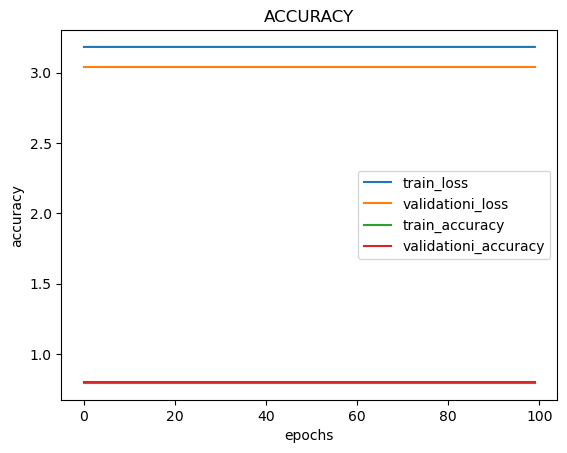

In [133]:
plt.title('LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label= 'validationi_loss')
plt.legend(loc='best')

plt.title('ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(result.history['accuracy'], label='train_accuracy')
plt.plot(result.history['val_accuracy'], label= 'validationi_accuracy')
plt.legend(loc='best')